## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

C:\Users\Sara Rostami.D\.conda\envs\base2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sara Rostami.D\.conda\envs\base2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Sara Rostami.D\.conda\envs\base2\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


## loading the dataset

In [2]:
data_raw = pd.read_csv('DataCognitive_Task2.csv')

# <font color=blue>1) Data Cleaning</font>

## 0. multiply rt by 1000 to represent time in units of miliseconds

In [3]:
data_new0 = data_raw.copy()
data_new0.loc[:,'rt'] *= 1000
data_new0.head(3)

Unnamed: 0         sbj     stm         rt key  pos uhnd hndns eye sex  \
0           0  8101004202  50.bmp  3825.6899   p  1.0    r     r   r   m   
1           1  8101004202  60.bmp  2733.8578   p  7.0    r     r   r   m   
2           2  8101004202  60.bmp  1618.6838   p  2.0    r     r   r   m   

    age  edu  size  
0  22.0  2.0   NaN  
1  22.0  2.0   NaN  
2  22.0  2.0   NaN

## 1. removing the null columns & null rows (if they exist) & also 'size' column

In [4]:
data_new1 = data_new0.copy()
data_new1.dropna(how='all', axis='columns', inplace=True)
data_new1.dropna(how='all', axis='rows', inplace=True)
data_new1.drop(columns='size', axis='columns', inplace=True)

## 2. detecting & removing outliers

In [5]:
#detecting the low outliers(reaction time less than 100 ms)
data_new2 = data_new1.copy()
## reporting the low outliers by their unique number
low_outliers = data_new2[data_new2['rt'] < 100][['sbj','rt']]
print("lower outliers:")
print(low_outliers)
data_new2 = data_new2[data_new2['rt'] >= 100] #the dataset without low outliers

#detecting the upper outliers (reaction time greater than 2s)
data_new3 = data_new2.copy()
## reporting the upper outliers by their unique number
up_outliers = data_new3[data_new3['rt'] > 2000][['sbj','rt']]
print("upper outliers:")
print(up_outliers)
data_new3 = data_new2[data_new3['rt'] <= 2000] #the dataset without upper outliers
"""
print(data_new1.shape)
print(data_new2.shape)
print(data_new3.shape)
print(low_outliers)

data_new3['rt'].hist()
"""

lower outliers:
               sbj           rt
1935    8106973112    85.750900
1963    8106973112    65.821900
1965    8106973112    41.740400
2029    8106973112    37.364000
2031    8106973112    98.864500
...            ...          ...
109335  8101000191    50.334200
109746  8101000191    43.074600
111375  8101000631 -1837.331057
116820  8101003791    50.201300
117814  8101003791    53.678900

[2899 rows x 2 columns]
upper outliers:
               sbj           rt
0       8101004202  3825.689900
1       8101004202  2733.857800
4       8101004202  3540.292300
10      8101004202  3049.833300
11      8101004202  4220.237400
...            ...          ...
121365  8101000632  2402.512074
121382  8101000632  4169.779062
121431  8101000632  2712.485790
121432  8101000632  4536.098003
121470  8101000632  3922.827005

[5820 rows x 2 columns]


"\nprint(data_new1.shape)\nprint(data_new2.shape)\nprint(data_new3.shape)\nprint(low_outliers)\n\ndata_new3['rt'].hist()\n"

## 3. correcting the wrongly numbered positions

In [6]:
#finding the subjects with wrongly numbered positions ( position 0 to 12, instead of 1 to 13)
false_pos_sbjs = data_new3.loc[data_new3['pos'] == 0,'sbj']
false_pos_sbjs = false_pos_sbjs.drop_duplicates()
false_pos_sbjs = list(false_pos_sbjs)
#correcting the wrongly numbered positions by adding 1 to these numbers
data_new4 = data_new3.copy()
data_new4.loc[data_new4['sbj'].isin(false_pos_sbjs),'pos'] = data_new4.loc[data_new4['sbj'].isin(false_pos_sbjs), 'pos'] + 1
data_new4.loc[data_new4['sbj'].isin(false_pos_sbjs),'pos'].head(25)

11232     7.0
11233    11.0
11234     5.0
11235     6.0
11236    12.0
11237    13.0
11238     4.0
11239     1.0
11240     7.0
11241     6.0
11242     4.0
11243     5.0
11244     5.0
11245    11.0
11246     2.0
11247     1.0
11248     4.0
11249     5.0
11250    10.0
11251     9.0
11252    13.0
11253     9.0
11254     1.0
11255     5.0
11256     4.0
Name: pos, dtype: float64

## 4. replacing capital i (I) with small L (l) in the 'uhnd' column

In [7]:
data_new5 = data_new4.copy()
data_new5.loc[data_new5['uhnd'] == 'I','uhnd'] = 'l'

## 5. removing the data from subject "8101003612" (it contained lots of Nan values)

In [8]:
data_new5.drop(data_new5.index[(data_new5['sbj'] == "8101003612")],axis=0,inplace=True)
data_new5.shape

(111569, 12)

## 6. Saving the preprocessed dataset

In [9]:
data_new5.to_csv('preprocessed_810100355.csv')

In [10]:
print(data_raw.shape)
print(data_new5.shape)

(121695, 13)
(111569, 12)


# <font color=blue>2) Exploring the Data</font>

In [11]:
data_new6 = data_new5.copy()
accuracy = np.zeros(9) # there are 9 pictures(stimulas)

## 1. Adding Eccentricity Column to the dataset

In [12]:
#the function that maps positions to eccentrity numbers
def map_ecc(x):
    if x == 1:
        return 0
    elif (x==2) or (x==3) or (x==4) or (x==5) or (x==6) or (x==7):
        return 1
    else:
        return 2
# adding the Eccentricity column
data_new6['ecc'] = data_new6['pos'].apply(map_ecc)

## 2. Adding Visual Field Column

In [13]:
#the function that maps positions to visual field numbers
def map_vf(x):
    if x == 1:
        return 0 #center visual field
    elif (x==2) or (x==8) or (x==13):
        return 1 #right visual field
    elif (x==3) or (x==4) or (x==9):
        return 2 #upper visual field
    elif (x==5) or (x==10) or (x==11):
        return 3 #left visual field
    else:
        return 4 #lower visual field
# adding the Visual Field column
data_new6['vf'] = data_new6['pos'].apply(map_vf)

## 3. Adding Used Dominant Hand Column

In [14]:
# adding the UsedDominantHand column
data_new6['udh'] = data_new6.apply(lambda x : 1 if x['uhnd'] == x['hndns'] else 0, axis=1)
data_new6.head(3)

Unnamed: 0         sbj     stm         rt key   pos uhnd hndns eye sex  \
2           2  8101004202  60.bmp  1618.6838   p   2.0    r     r   r   m   
3           3  8101004202  50.bmp   925.6644   o  10.0    r     r   r   m   
5           5  8101004202  70.bmp  1163.9952   o   6.0    r     r   r   m   

    age  edu  ecc  vf  udh  
2  22.0  2.0    1   1    1  
3  22.0  2.0    2   3    1  
5  22.0  2.0    1   4    1

## 4. Adding Accuracy Column
####   (  1: means answered correctly    ,   0: means answered incorrectly    )

In [15]:
data_new6['acc'] = data_new6.apply(lambda x : 1 if ((x['key'] == 'w' or x['key'] == 'p') and (x['stm']=='0.bmp' or x['stm']=='10.bmp' or x['stm']=='20.bmp' or x['stm']=='30.bmp')) or((x['key'] == 'q' or x['key'] == 'o') and (x['stm']=='50.bmp' or x['stm']=='60.bmp' or x['stm']=='70.bmp' or x['stm']=='80.bmp')) else 0, axis=1)
data_new6.head(10)

Unnamed: 0         sbj     stm         rt key   pos uhnd hndns eye sex  \
2            2  8101004202  60.bmp  1618.6838   p   2.0    r     r   r   m   
3            3  8101004202  50.bmp   925.6644   o  10.0    r     r   r   m   
5            5  8101004202  70.bmp  1163.9952   o   6.0    r     r   r   m   
6            6  8101004202  50.bmp  1023.1118   o   9.0    r     r   r   m   
7            7  8101004202  80.bmp  1273.9481   p   1.0    r     r   r   m   
8            8  8101004202  80.bmp   970.4250   o  10.0    r     r   r   m   
9            9  8101004202  30.bmp  1614.3408   p  13.0    r     r   r   m   
12          12  8101004202  10.bmp  1654.1704   o  12.0    r     r   r   m   
14          14  8101004202  60.bmp  1175.1443   p  13.0    r     r   r   m   
15          15  8101004202  70.bmp  1396.8781   p   4.0    r     r   r   m   

     age  edu  ecc  vf  udh  acc  
2   22.0  2.0    1   1    1    0  
3   22.0  2.0    2   3    1    1  
5   22.0  2.0    1   4    1    1  
6   22.0  2.0    2   2    1    1  
7   22.0  2.0    0   0    1    0  
8   22.0  2.0    2   3    1    1  
9   22.0  2.0    2   1    1    1  
12  22.0  2.0    2   4    1    0  
14  22.0  2.0    2   1    1    0  
15  22.0  2.0    1   2    1    0

## 5. Adding logarithm of Reaction Time column

<AxesSubplot:>

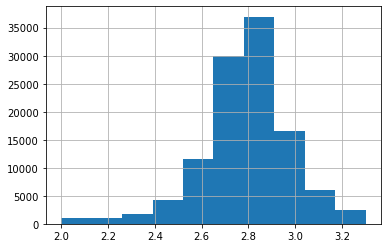

In [16]:
data_new6['lrt'] = np.log10(data_new6['rt'])
data_new6['lrt'].hist()

<AxesSubplot:>

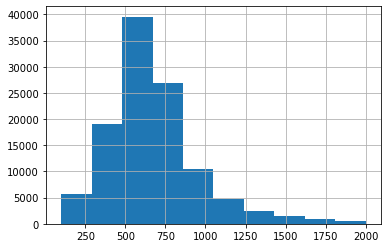

In [17]:
data_new6['rt'].hist()

## 6. adding the Answers column(what the participants chose)
#### (0:means male , 1:means female)

In [18]:
#the function that maps selected keys to sex
def map_ans(x):
    if x == 'q' or x == 'o':
        return 1 #female
    else:
        return 0 #male
# adding the answer column
data_new6['ans'] = data_new6['key'].apply(map_ans)
data_new6.head(5)

Unnamed: 0         sbj     stm         rt key   pos uhnd hndns eye sex  \
2           2  8101004202  60.bmp  1618.6838   p   2.0    r     r   r   m   
3           3  8101004202  50.bmp   925.6644   o  10.0    r     r   r   m   
5           5  8101004202  70.bmp  1163.9952   o   6.0    r     r   r   m   
6           6  8101004202  50.bmp  1023.1118   o   9.0    r     r   r   m   
7           7  8101004202  80.bmp  1273.9481   p   1.0    r     r   r   m   

    age  edu  ecc  vf  udh  acc       lrt  ans  
2  22.0  2.0    1   1    1    0  3.209162    0  
3  22.0  2.0    2   3    1    1  2.966454    1  
5  22.0  2.0    1   4    1    1  3.065951    1  
6  22.0  2.0    2   2    1    1  3.009923    1  
7  22.0  2.0    0   0    1    0  3.105152    0

## 7. removing rows with 'stm' = '40.bmp'

In [19]:
data_new7 = data_new6.copy() #new_data6 contains 40.bmp but data_new7 is not gonna
data_new7.drop(data_new7.index[(data_new6['stm'] == "40.bmp")],axis=0,inplace=True)
print(data_new6.shape)
print(data_new7.shape)

(111569, 18)
(99222, 18)


In [20]:
data_new7 = data_new7.astype({"pos": int,'age':int,'edu':int})

## 8. visualizing the data

In [21]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,5

#### @barplot_1 of Reaction Time for each loc (for female & male)

Text(0, 0.5, 'Reaction Time')

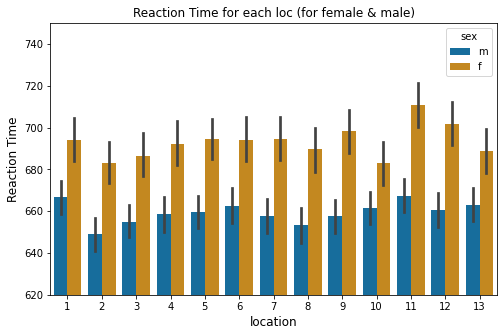

In [22]:
p1 = sns.barplot( x = data_new7['pos'],y = data_new7['rt'], hue = data_new7['sex'],palette="colorblind")
p1.set(ylim = (620,750), title="Reaction Time for each loc (for female & male)")
p1.set_xlabel("location", fontsize = 12)
p1.set_ylabel("Reaction Time", fontsize = 12)

#### @barplot_2 of Reaction Time for each eccentricity (for female & male)

Text(0, 0.5, 'Reaction Time')

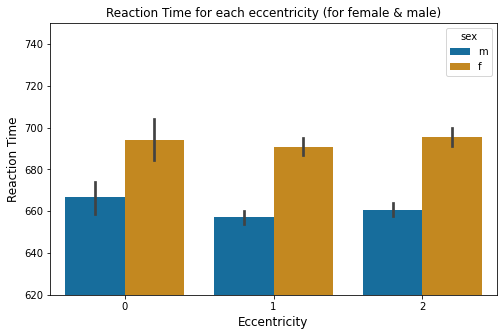

In [23]:
p2 = sns.barplot( x = data_new7['ecc'],y = data_new7['rt'], hue = data_new7['sex'],palette="colorblind")
p2.set(ylim = (620,750), title="Reaction Time for each eccentricity (for female & male)")
p2.set_xlabel("Eccentricity", fontsize = 12)
p2.set_ylabel("Reaction Time", fontsize = 12)

#### @barplot_3 of Reaction Time according to visual field (for female & male)

Text(0, 0.5, 'Reaction Time')

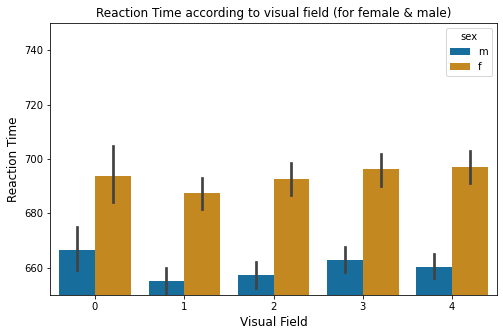

In [24]:
p3 = sns.barplot(x = data_new7['vf'],y = data_new7['rt'], hue = data_new7['sex'],palette="colorblind")
p3.set(ylim = (650,750), title="Reaction Time according to visual field (for female & male)")
p3.set_xlabel("Visual Field", fontsize = 12)
p3.set_ylabel("Reaction Time", fontsize = 12)

#### @barplot_4 of Reaction Time according to visual field (for right-handed & left-handed)

Text(0, 0.5, 'Reaction Time')

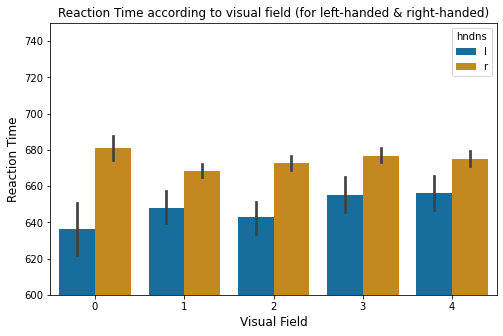

In [25]:
hue_order = ['l', 'r']
p4 = sns.barplot( x = data_new7['vf'],y = data_new7['rt'], hue = data_new7['hndns'],palette="colorblind", hue_order=hue_order)
p4.set(ylim = (600,750), title="Reaction Time according to visual field (for left-handed & right-handed)")
p4.set_xlabel("Visual Field", fontsize = 12)
p4.set_ylabel("Reaction Time", fontsize = 12)

#### @barplot_5 of Reaction Time according to visual field (for left and right eyedness)

Text(0, 0.5, 'Reaction Time')

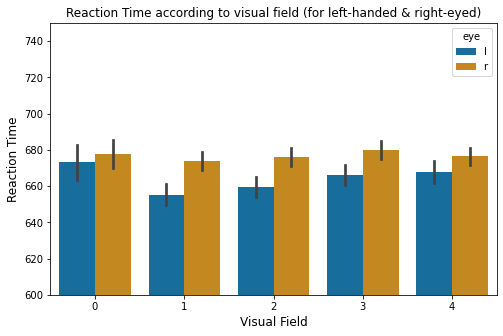

In [26]:
hue_order = ['l', 'r']
p5 = sns.barplot( x = data_new7['vf'],y = data_new7['rt'], hue = data_new7['eye'],palette="colorblind", hue_order=hue_order)
p5.set(ylim = (600,750), title="Reaction Time according to visual field (for left-handed & right-eyed)")
p5.set_xlabel("Visual Field", fontsize = 12)
p5.set_ylabel("Reaction Time", fontsize = 12)

#### @ barplot_6 of Reaction Time according to the hand they used( & whether they used their dominant hand)

Text(0, 0.5, 'Reaction Time')

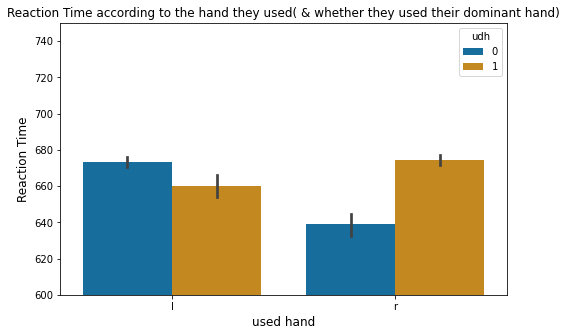

In [27]:
hue_order = [0, 1]
p6 = sns.barplot( x = data_new7['uhnd'],y = data_new7['rt'], hue = data_new7['udh'],palette="colorblind",order=['l','r'], hue_order=hue_order)
p6.set(ylim = (600,750), title="Reaction Time according to the hand they used( & whether they used their dominant hand)")
p6.set_xlabel("used hand", fontsize = 12)
p6.set_ylabel("Reaction Time", fontsize = 12)

#### @ barplot_7 of Accuracy for each loc (for female & male)

Text(0, 0.5, 'Accuracy')

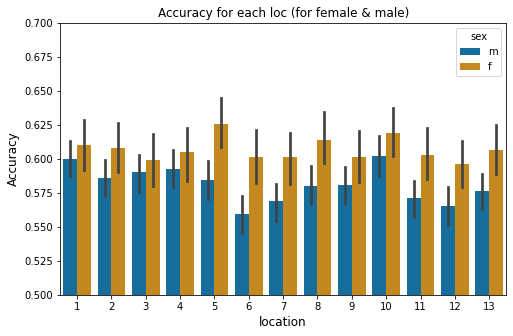

In [28]:
p7 = sns.barplot( x = data_new7['pos'],y = data_new7['acc'], hue = data_new7['sex'],palette="colorblind")
p7.set(ylim = (0.5,0.7), title="Accuracy for each loc (for female & male)")
p7.set_xlabel("location", fontsize = 12)
p7.set_ylabel("Accuracy", fontsize = 12)

#### @barplot_8 of Accuracy for each eccentricity (for female & male)

Text(0, 0.5, 'Accuracy')

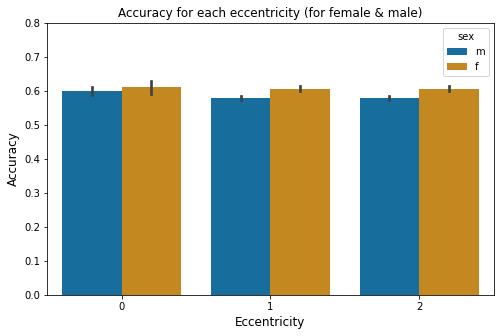

In [29]:
p8 = sns.barplot(x = data_new7['ecc'],y = data_new7['acc'], hue = data_new7['sex'],palette="colorblind")
p8.set(ylim = (0,0.8), title="Accuracy for each eccentricity (for female & male)")
p8.set_xlabel("Eccentricity", fontsize = 12)
p8.set_ylabel("Accuracy", fontsize = 12)

#### @barplot_9 of Accuracy according to visual field (for female & male)

Text(0, 0.5, 'Accuracy')

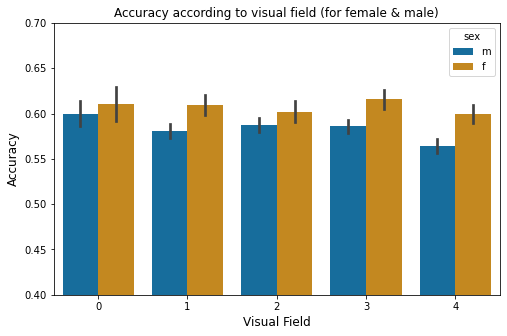

In [30]:
p9 = sns.barplot(x = data_new7['vf'],y = data_new7['acc'], hue = data_new7['sex'],palette="colorblind")
p9.set(ylim = (0.4,0.7), title="Accuracy according to visual field (for female & male)")
p9.set_xlabel("Visual Field", fontsize = 12)
p9.set_ylabel("Accuracy", fontsize = 12)

#### @barplot_10 of Accuracy according to visual field (for left and right eyedness)

Text(0, 0.5, 'Accuracy')

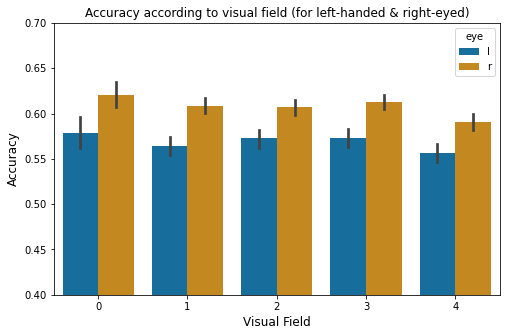

In [31]:
hue_order = ['l', 'r']
p10 = sns.barplot( x = data_new7['vf'],y = data_new7['acc'], hue = data_new7['eye'],palette="colorblind", hue_order=hue_order)
p10.set(ylim = (0.4,0.7), title="Accuracy according to visual field (for left-handed & right-eyed)")
p10.set_xlabel("Visual Field", fontsize = 12)
p10.set_ylabel("Accuracy", fontsize = 12)

#### @ barplot_11 of Accuracy according to the hand they used( & whether they used their dominant hand)

Text(0, 0.5, 'Accuracy')

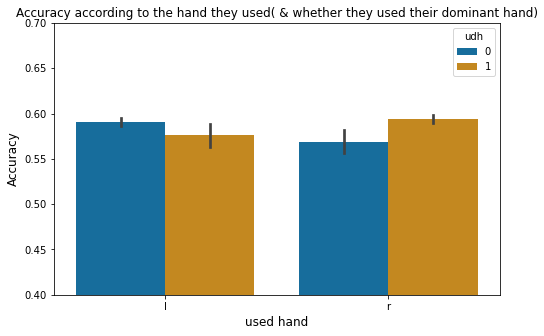

In [32]:
hue_order = [0, 1]
p11 = sns.barplot( x = data_new7['uhnd'],y = data_new7['acc'], hue = data_new7['udh'],palette="colorblind",order=['l','r'], hue_order=hue_order)
p11.set(ylim = (0.4,0.7), title="Accuracy according to the hand they used( & whether they used their dominant hand)")
p11.set_xlabel("used hand", fontsize = 12)
p11.set_ylabel("Accuracy", fontsize = 12)

#### @ barplot_12 of Accuracy according to education

Text(0, 0.5, 'Accuracy')

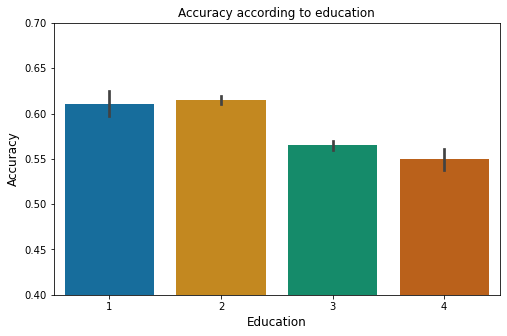

In [33]:
p12 = sns.barplot( x = data_new7['edu'],y = data_new7['acc'], palette="colorblind")
p12.set(ylim = (0.4,0.7), title="Accuracy according to education")
p12.set_xlabel("Education", fontsize = 12)
p12.set_ylabel("Accuracy", fontsize = 12)

#### @ barplot_13 of Accuracy according to their dominant hand(for each visual field)

Text(0, 0.5, 'Accuracy')

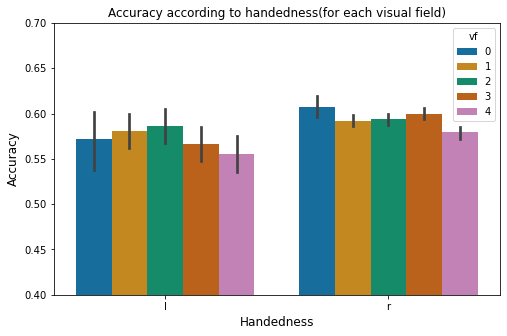

In [34]:
p13 = sns.barplot( x = data_new7['hndns'],y = data_new7['acc'],hue=data_new7['vf'],order=['l','r'], palette="colorblind")
p13.set(ylim = (0.4,0.7), title="Accuracy according to handedness(for each visual field)")
p13.set_xlabel("Handedness", fontsize = 12)
p13.set_ylabel("Accuracy", fontsize = 12)

#### @ barplot_14 of Reaction Time according to education

Text(0, 0.5, 'Reaction Time')

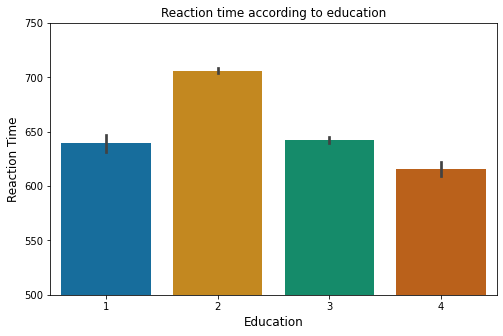

In [35]:
p14 = sns.barplot( x = data_new7['edu'],y = data_new7['rt'], palette="colorblind")
p14.set(ylim = (500,750), title="Reaction time according to education")
p14.set_xlabel("Education", fontsize = 12)
p14.set_ylabel("Reaction Time", fontsize = 12)

## 9. Statistical Tests

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols,logit

In [37]:
data_new8 = data_new7.copy()
data_new8 = data_new8.astype({"pos": str,'vf': str,'edu':str,'ecc':str})

#### Test_1) Dependent var. = rt &emsp; Independent vars = pos , sex

In [38]:
model1 = ols('rt ~ pos + sex + pos*sex', data = data_new8).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.52
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.53e-61
Time:                        17:45:43   Log-Likelihood:            -7.0089e+05
No. Observations:               99222   AIC:                         1.402e+06
Df Residuals:                   99196   BIC:                         1.402e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            693.8684      5.537    125.309      0.000     683.015     704.721
pos[T.10]            -11.0379      7.841     -1.408      0.159     -26.407       4.331
pos[T.11]             17.0558      7.783      2.191      0.028       1.801      32.311
pos[T.12]              8.0257      7.835      1.024      0.306      -7.330      23.381
pos[T.13]             -4.9114      7.861     -0.625      0.532     -20.319      10.497
pos[T.2]             -10.6677      7.806     -1.367      0.172     -25.967       4.631
pos[T.3]              -7.5239      7.843     -0.959      0.337     -22.896       7.848
pos[T.4]              -1.5186      7.827     -0.194      0.846     -16.860      13.822
pos[T.5]               0.5857      7.793      0.075      0.940     -14.689      15.860
pos[T.6]               0.3538      7.845      0.045      0.964     -15.023      15.730
pos[T.7]               0.7700      7.780      0.099      0.921     -14.478      16.018
pos[T.8]              -4.0357      7.878     -0.512      0.608     -19.477      11.406
pos[T.9]               4.5149      7.759      0.582      0.561     -10.693      19.722
sex[T.m]             -27.2576      6.834     -3.988      0.000     -40.652     -13.863
pos[T.10]:sex[T.m]     6.0899      9.666      0.630      0.529     -12.855      25.035
pos[T.11]:sex[T.m]   -16.3066      9.607     -1.697      0.090     -35.137       2.524
pos[T.12]:sex[T.m]   -14.0168      9.667     -1.450      0.147     -32.964       4.931
pos[T.13]:sex[T.m]     1.4234      9.685      0.147      0.883     -17.560      20.406
pos[T.2]:sex[T.m]     -7.0998      9.642     -0.736      0.462     -25.999      11.799
pos[T.3]:sex[T.m]     -4.1285      9.667     -0.427      0.669     -23.076      14.820
pos[T.4]:sex[T.m]     -6.2153      9.678     -0.642      0.521     -25.185      12.754
pos[T.5]:sex[T.m]     -7.4748      9.626     -0.776      0.437     -26.343      11.393
pos[T.6]:sex[T.m]     -4.3892      9.673     -0.454      0.650     -23.349      14.570
pos[T.7]:sex[T.m]     -9.8896      9.622     -1.028      0.304     -28.749       8.970
pos[T.8]:sex[T.m]     -9.0365      9.699     -0.932      0.351     -28.046       9.973
pos[T.9]:sex[T.m]    -13.4616      9.602     -1.402      0.161     -32.282       5.359
==============================================================================
Omnibus:                    23270.217   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60829.712
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                       5.872   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correct

#### Test_2) Dependent var. = rt &emsp; Independent vars =    ecc , sex

In [39]:
model2 = ols('rt ~ ecc + sex + ecc*sex', data = data_new8).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     65.53
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.46e-68
Time:                        17:45:44   Log-Likelihood:            -7.0091e+05
No. Observations:               99222   AIC:                         1.402e+06
Df Residuals:                   99216   BIC:                         1.402e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           693.8684      5.538    125.299      0.000     683.015     704.722
ecc[T.1]             -2.9873      5.978     -0.500      0.617     -14.704       8.729
ecc[T.2]              1.7323      5.980      0.290      0.772      -9.989      13.453
sex[T.m]            -27.2576      6.835     -3.988      0.000     -40.653     -13.862
ecc[T.1]:sex[T.m]    -6.5500      7.379     -0.888      0.375     -21.013       7.913
ecc[T.2]:sex[T.m]    -7.6614      7.380     -1.038      0.299     -22.126       6.803
==============================================================================
Omnibus:                    23275.102   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60846.068
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                       5.873   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Test_3) Dependent var. = rt &emsp; Independent vars =    vf , sex

In [40]:
model3 = ols('rt ~ vf + sex + vf*sex', data = data_new8).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     37.26
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.07e-66
Time:                        17:45:46   Log-Likelihood:            -7.0090e+05
No. Observations:               99222   AIC:                         1.402e+06
Df Residuals:                   99212   BIC:                         1.402e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          693.8684      5.538    125.302      0.000     683.015     704.722
vf[T.1]             -6.5847      6.401     -1.029      0.304     -19.131       5.962
vf[T.2]             -1.4217      6.385     -0.223      0.824     -13.937      11.094
vf[T.3]              2.3359      6.384      0.366      0.714     -10.177      14.848
vf[T.4]              3.0329      6.390      0.475      0.635      -9.491      15.556
sex[T.m]           -27.2576      6.834     -3.988      0.000     -40.653     -13.862
vf[T.1]:sex[T.m]    -4.8521      7.896     -0.614      0.539     -20.328      10.624
vf[T.2]:sex[T.m]    -8.0394      7.885     -1.020      0.308     -23.494       7.416
vf[T.3]:sex[T.m]    -6.0119      7.879     -0.763      0.445     -21.454       9.430
vf[T.4]:sex[T.m]    -9.4128      7.887     -1.193      0.233     -24.872       6.046
==============================================================================
Omnibus:                    23279.241   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60869.850
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                       5.873   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Test_4) Dependent var. = rt &emsp; Independent vars =    vf , hndns

In [41]:
model4 = ols('rt ~ vf + hndns + vf*hndns', data = data_new8).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.66
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.07e-16
Time:                        17:45:47   Log-Likelihood:            -7.0102e+05
No. Observations:               99222   AIC:                         1.402e+06
Df Residuals:                   99212   BIC:                         1.402e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            636.3994      9.575     66.462      0.000     617.632     655.167
vf[T.1]               11.7172     11.050      1.060      0.289      -9.942      33.376
vf[T.2]                6.3337     11.053      0.573      0.567     -15.329      27.997
vf[T.3]               18.9429     11.037      1.716      0.086      -2.689      40.574
vf[T.4]               19.5879     11.051      1.773      0.076      -2.072      41.248
hndns[T.r]            44.7253     10.180      4.394      0.000      24.774      64.677
vf[T.1]:hndns[T.r]   -24.3780     11.749     -2.075      0.038     -47.405      -1.351
vf[T.2]:hndns[T.r]   -14.6110     11.750     -1.243      0.214     -37.641       8.419
vf[T.3]:hndns[T.r]   -23.2346     11.733     -1.980      0.048     -46.231      -0.238
vf[T.4]:hndns[T.r]   -25.6558     11.748     -2.184      0.029     -48.682      -2.629
==============================================================================
Omnibus:                    22722.179   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58742.232
Skew:                           1.246   Prob(JB):                         0.00
Kurtosis:                       5.828   Cond. No.                         52.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Test_5) Dependent var. = rt &emsp; Independent vars =   vf , eye

In [42]:
model5 = ols('rt ~ vf + eye + vf*eye', data = data_new8).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.378
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.33e-12
Time:                        17:45:48   Log-Likelihood:            -7.0103e+05
No. Observations:               99221   AIC:                         1.402e+06
Df Residuals:                   99211   BIC:                         1.402e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          673.4973      5.072    132.780      0.000     663.556     683.439
vf[T.1]            -18.3495      5.861     -3.131      0.002     -29.836      -6.863
vf[T.2]            -13.7821      5.850     -2.356      0.018     -25.249      -2.315
vf[T.3]             -7.3006      5.846     -1.249      0.212     -18.759       4.158
vf[T.4]             -5.7816      5.854     -0.988      0.323     -17.255       5.692
eye[T.r]             4.2015      6.606      0.636      0.525      -8.747      17.150
vf[T.1]:eye[T.r]    14.3292      7.630      1.878      0.060      -0.625      29.284
vf[T.2]:eye[T.r]    12.2635      7.624      1.609      0.108      -2.679      27.206
vf[T.3]:eye[T.r]     9.6492      7.615      1.267      0.205      -5.276      24.575
vf[T.4]:eye[T.r]     4.5170      7.625      0.592      0.554     -10.428      19.462
==============================================================================
Omnibus:                    22880.764   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59318.424
Skew:                           1.254   Prob(JB):                         0.00
Kurtosis:                       5.839   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Test_6) Dependent var. = rt &emsp; Independent vars =   uhnd , udh

In [43]:
model6 = ols('rt ~ uhnd + udh + uhnd*udh', data = data_new8).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     30.60
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           9.21e-20
Time:                        17:45:49   Log-Likelihood:            -7.0102e+05
No. Observations:               99221   AIC:                         1.402e+06
Df Residuals:                   99217   BIC:                         1.402e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       673.2436      1.354    497.239      0.000     670.590     675.897
uhnd[T.r]       -34.3696      3.986     -8.623      0.000     -42.182     -26.558
udh             -13.2135      3.977     -3.322      0.001     -21.009      -5.418
uhnd[T.r]:udh    48.9146      5.630      8.688      0.000      37.880      59.949
==============================================================================
Omnibus:                    22731.571   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58798.811
Skew:                           1.246   Prob(JB):                         0.00
Kurtosis:                       5.830   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Test_7) Dependent var. = acc &emsp; Independent vars = pos , sex 

In [44]:
model7 = logit('acc ~ pos + sex + pos*sex', data = data_new8).fit()
model7.summary()

Optimization terminated successfully.
         Current function value: 0.676253
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99222
Model:                          Logit   Df Residuals:                    99196
Method:                           MLE   Df Model:                           25
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:               0.0008408
Time:                        17:45:51   Log-Likelihood:                -67099.
converged:                       True   LL-Null:                       -67156.
Covariance Type:            nonrobust   LLR p-value:                 3.838e-13
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4488      0.040     11.181      0.000       0.370       0.527
pos[T.10]              0.0367      0.057      0.644      0.520      -0.075       0.148
pos[T.11]             -0.0308      0.056     -0.547      0.584      -0.141       0.080
pos[T.12]             -0.0593      0.057     -1.047      0.295      -0.170       0.052
pos[T.13]             -0.0173      0.057     -0.304      0.761      -0.129       0.094
pos[T.2]              -0.0091      0.057     -0.162      0.872      -0.120       0.102
pos[T.3]              -0.0472      0.057     -0.831      0.406      -0.158       0.064
pos[T.4]              -0.0225      0.057     -0.398      0.691      -0.134       0.089
pos[T.5]               0.0651      0.057      1.148      0.251      -0.046       0.176
pos[T.6]              -0.0362      0.057     -0.638      0.523      -0.147       0.075
pos[T.7]              -0.0386      0.056     -0.686      0.492      -0.149       0.072
pos[T.8]               0.0163      0.057      0.285      0.776      -0.096       0.128
pos[T.9]              -0.0362      0.056     -0.645      0.519      -0.146       0.074
sex[T.m]              -0.0440      0.049     -0.889      0.374      -0.141       0.053
pos[T.10]:sex[T.m]    -0.0285      0.070     -0.407      0.684      -0.166       0.109
pos[T.11]:sex[T.m]    -0.0884      0.069     -1.274      0.203      -0.224       0.048
pos[T.12]:sex[T.m]    -0.0825      0.070     -1.183      0.237      -0.219       0.054
pos[T.13]:sex[T.m]    -0.0787      0.070     -1.126      0.260      -0.216       0.058
pos[T.2]:sex[T.m]     -0.0482      0.070     -0.692      0.489      -0.185       0.088
pos[T.3]:sex[T.m]      0.0064      0.070      0.092      0.927      -0.130       0.143
pos[T.4]:sex[T.m]     -0.0074      0.070     -0.105      0.916      -0.144       0.130
pos[T.5]:sex[T.m]     -0.1274      0.070     -1.826      0.068      -0.264       0.009
pos[T.6]:sex[T.m]     -0.1310      0.070     -1.879      0.060      -0.268       0.006
pos[T.7]:sex[T.m]     -0.0897      0.069     -1.292      0.196      -0.226       0.046
pos[T.8]:sex[T.m]     -0.0980      0.070     -1.398      0.162      -0.236       0.039
pos[T.9]:sex[T.m]     -0.0431      0.069     -0.622      0.534      -0.179       0.093
======================================================================================
"""

#### Test_8) Dependent var. = acc &emsp; Independent vars =  ecc , sex

In [45]:
model8 = logit('acc ~ ecc + sex + ecc*sex', data = data_new8).fit()
model8.summary()

Optimization terminated successfully.
         Current function value: 0.676472
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99222
Model:                          Logit   Df Residuals:                    99216
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:               0.0005172
Time:                        17:45:53   Log-Likelihood:                -67121.
converged:                       True   LL-Null:                       -67156.
Covariance Type:            nonrobust   LLR p-value:                 1.321e-13
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4488      0.040     11.181      0.000       0.370       0.527
ecc[T.1]             -0.0147      0.043     -0.339      0.734      -0.100       0.070
ecc[T.2]             -0.0156      0.043     -0.359      0.719      -0.101       0.069
sex[T.m]             -0.0440      0.049     -0.889      0.374      -0.141       0.053
ecc[T.1]:sex[T.m]    -0.0666      0.053     -1.248      0.212      -0.171       0.038
ecc[T.2]:sex[T.m]    -0.0696      0.053     -1.304      0.192      -0.174       0.035
=====================================================================================
"""

#### Test_9) Dependent var. = acc &emsp; Independent vars =  vf , sex

In [46]:
model9 = logit('acc ~ vf + sex + vf*sex', data = data_new8).fit()
model9.summary()

Optimization terminated successfully.
         Current function value: 0.676340
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99222
Model:                          Logit   Df Residuals:                    99212
Method:                           MLE   Df Model:                            9
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:               0.0007116
Time:                        17:45:56   Log-Likelihood:                -67108.
converged:                       True   LL-Null:                       -67156.
Covariance Type:            nonrobust   LLR p-value:                 1.227e-16
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4488      0.040     11.181      0.000       0.370       0.527
vf[T.1]             -0.0035      0.046     -0.076      0.940      -0.094       0.087
vf[T.2]             -0.0353      0.046     -0.763      0.445      -0.126       0.055
vf[T.3]              0.0232      0.046      0.502      0.616      -0.068       0.114
vf[T.4]             -0.0447      0.046     -0.966      0.334      -0.135       0.046
sex[T.m]            -0.0440      0.049     -0.889      0.374      -0.141       0.053
vf[T.1]:sex[T.m]    -0.0749      0.057     -1.312      0.190      -0.187       0.037
vf[T.2]:sex[T.m]    -0.0149      0.057     -0.261      0.794      -0.127       0.097
vf[T.3]:sex[T.m]    -0.0816      0.057     -1.430      0.153      -0.193       0.030
vf[T.4]:sex[T.m]    -0.1011      0.057     -1.775      0.076      -0.213       0.011
====================================================================================
"""

#### Test_10) Dependent var. = acc &emsp; Independent vars =  vf , eye

In [47]:
model10 = logit('acc ~ vf + eye + vf*eye', data = data_new8).fit()
model10.summary()

Optimization terminated successfully.
         Current function value: 0.675937
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99221
Model:                          Logit   Df Residuals:                    99211
Method:                           MLE   Df Model:                            9
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                0.001309
Time:                        17:45:58   Log-Likelihood:                -67067.
converged:                       True   LL-Null:                       -67155.
Covariance Type:            nonrobust   LLR p-value:                 3.671e-33
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3162      0.036      8.720      0.000       0.245       0.387
vf[T.1]             -0.0580      0.042     -1.386      0.166      -0.140       0.024
vf[T.2]             -0.0239      0.042     -0.572      0.567      -0.106       0.058
vf[T.3]             -0.0226      0.042     -0.541      0.589      -0.104       0.059
vf[T.4]             -0.0898      0.042     -2.150      0.032      -0.172      -0.008
eye[T.r]             0.1772      0.048      3.725      0.000       0.084       0.270
vf[T.1]:eye[T.r]     0.0073      0.055      0.133      0.895      -0.100       0.115
vf[T.2]:eye[T.r]    -0.0356      0.055     -0.648      0.517      -0.143       0.072
vf[T.3]:eye[T.r]    -0.0138      0.055     -0.252      0.801      -0.121       0.094
vf[T.4]:eye[T.r]    -0.0371      0.055     -0.678      0.498      -0.145       0.070
====================================================================================
"""

#### Test_11) Dependent var. = acc &emsp; Independent vars =  uhnd , udh

In [48]:
model11 = logit('acc ~ uhnd + udh + uhnd*udh', data = data_new8).fit()
model11.summary()

Optimization terminated successfully.
         Current function value: 0.676727
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99221
Model:                          Logit   Df Residuals:                    99217
Method:                           MLE   Df Model:                            3
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:               0.0001418
Time:                        17:46:00   Log-Likelihood:                -67146.
converged:                       True   LL-Null:                       -67155.
Covariance Type:            nonrobust   LLR p-value:                 0.0002680
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3673      0.010     37.776      0.000       0.348       0.386
uhnd[T.r]        -0.0926      0.028     -3.258      0.001      -0.148      -0.037
udh              -0.0616      0.028     -2.165      0.030      -0.117      -0.006
uhnd[T.r]:udh     0.1679      0.040      4.175      0.000       0.089       0.247
=================================================================================
"""

#### Test_12) Dependent var. = acc &emsp; Independent var. =  edu

In [49]:
model12 = logit('acc ~ edu', data = data_new8).fit()
model12.summary()

Optimization terminated successfully.
         Current function value: 0.675392
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99222
Model:                          Logit   Df Residuals:                    99218
Method:                           MLE   Df Model:                            3
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                0.002113
Time:                        17:46:01   Log-Likelihood:                -67014.
converged:                       True   LL-Null:                       -67156.
Covariance Type:            nonrobust   LLR p-value:                 3.179e-61
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4513      0.031     14.563      0.000       0.391       0.512
edu[T.2]       0.0159      0.032      0.492      0.623      -0.048       0.079
edu[T.3]      -0.1901      0.033     -5.820      0.000      -0.254      -0.126
edu[T.4]      -0.2518      0.038     -6.584      0.000      -0.327      -0.177
==============================================================================
"""

#### Test_13) Dependent var. = acc &emsp; Independent vars =  vf , hndns

In [50]:
model13 = logit('acc ~ vf + hndns + vf*hndns', data = data_new8).fit()
model13.summary()

Optimization terminated successfully.
         Current function value: 0.676573
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99222
Model:                          Logit   Df Residuals:                    99212
Method:                           MLE   Df Model:                            9
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:               0.0003677
Time:                        17:46:03   Log-Likelihood:                -67131.
converged:                       True   LL-Null:                       -67156.
Covariance Type:            nonrobust   LLR p-value:                 1.403e-07
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2877      0.068      4.211      0.000       0.154       0.422
vf[T.1]                0.0375      0.079      0.475      0.635      -0.117       0.192
vf[T.2]                0.0599      0.079      0.758      0.448      -0.095       0.215
vf[T.3]               -0.0203      0.079     -0.258      0.796      -0.175       0.134
vf[T.4]               -0.0652      0.079     -0.828      0.408      -0.220       0.089
hndns[T.r]             0.1496      0.073      2.057      0.040       0.007       0.292
vf[T.1]:hndns[T.r]    -0.1028      0.084     -1.224      0.221      -0.267       0.062
vf[T.2]:hndns[T.r]    -0.1187      0.084     -1.412      0.158      -0.283       0.046
vf[T.3]:hndns[T.r]    -0.0117      0.084     -0.139      0.889      -0.176       0.153
vf[T.4]:hndns[T.r]    -0.0522      0.084     -0.623      0.534      -0.217       0.112
======================================================================================
"""

#### Test_14) Dependent var. = rt &emsp; Independent var. =  edu

In [51]:
model14 = ols('rt ~ edu', data = data_new8).fit()
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     506.9
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:46:04   Log-Likelihood:            -7.0032e+05
No. Observations:               99222   AIC:                         1.401e+06
Df Residuals:                   99218   BIC:                         1.401e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    639.3420      4.249    150.457      0.000     631.013     647.671
edu[T.2]      66.6157      4.437     15.014      0.000      57.919      75.312
edu[T.3]       2.8506      4.486      0.635      0.525      -5.942      11.643
edu[T.4]     -23.8578      5.280     -4.519      0.000     -34.206     -13.509
==============================================================================
Omnibus:                    23940.118   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63014.243
Skew:                           1.304   Prob(JB):                         0.00
Kurtosis:                       5.904   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <font color=blue>3) Prediction of Behavioral Characteristics</font>

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, logit

## 1. Prediction of Reaction Time (_rt_)

In [53]:
data_new9 = data_new8[['acc','rt','pos','ecc','vf', 'uhnd','udh', 'sex', 'hndns','eye','edu']].copy()
# left: 1   , right: 0
# female: 1    , male: 0
data_new9 = data_new9.astype({"pos": int,'vf': int,'edu':int,'ecc':int,'udh':int})
data_new9['uhnd'] = data_new9['uhnd'].replace({'l':1, 'r':0})
data_new9['eye'] = data_new9['eye'].replace({'l':1, 'r':0})
data_new9['hndns'] = data_new9['hndns'].replace({'l':1, 'r':0})
data_new9['sex'] = data_new9['sex'].replace({'f':1, 'm':0})

data_new9.dtypes

acc        int64
rt       float64
pos        int32
ecc        int32
vf         int32
uhnd     float64
udh        int32
sex        int64
hndns      int64
eye      float64
edu        int32
dtype: object

### - Initial model of _rt_

In [54]:
y = data_new9['rt']
x = data_new9[['pos','ecc','vf','uhnd','udh', 'sex', 'hndns','eye','edu']]
rt_model1 = sm.OLS(y,x , missing='drop').fit()
rt_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     rt   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                          4.920e+04
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                        0.00
Time:                        17:46:05   Log-Likelihood:                     -7.1050e+05
No. Observations:               99220   AIC:                                  1.421e+06
Df Residuals:                   99211   BIC:                                  1.421e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pos           -9.0718      0.613    -14.802      0.000     -10.273      -7.871
ecc          118.6405      3.404     34.848      0.000     111.968     125.313
vf            31.9144      0.834     38.287      0.000      30.281      33.548
uhnd         216.6748      2.691     80.523      0.000     211.401     221.949
udh          218.7474      2.688     81.370      0.000     213.478     224.016
sex           87.6514      2.134     41.082      0.000      83.470      91.833
hndns         41.8944      3.291     12.730      0.000      35.444      48.345
eye            4.6252      2.088      2.216      0.027       0.533       8.717
edu           87.0559      1.085     80.209      0.000      84.929      89.183
==============================================================================
Omnibus:                    14896.772   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29276.648
Skew:                           0.934   Prob(JB):                         0.00
Kurtosis:                       4.895   Cond. No.                         33.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### - Eliminating _eye_

In [55]:
y = data_new9['rt']
x = data_new9[['pos','ecc','vf','uhnd','udh', 'sex', 'hndns','edu']]
rt_model2 = sm.OLS(y,x , missing='drop').fit()
rt_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     rt   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                          5.535e+04
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                        0.00
Time:                        17:46:05   Log-Likelihood:                     -7.1051e+05
No. Observations:               99221   AIC:                                  1.421e+06
Df Residuals:                   99213   BIC:                                  1.421e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pos           -9.0797      0.613    -14.814      0.000     -10.281      -7.878
ecc          118.7178      3.404     34.873      0.000     112.045     125.390
vf            31.9412      0.833     38.322      0.000      30.308      33.575
uhnd         216.8216      2.690     80.601      0.000     211.549     222.094
udh          218.8888      2.688     81.443      0.000     213.621     224.157
sex           88.2152      2.119     41.638      0.000      84.063      92.368
hndns         43.7482      3.183     13.745      0.000      37.510      49.987
edu           87.5432      1.063     82.373      0.000      85.460      89.626
==============================================================================
Omnibus:                    14915.382   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29323.081
Skew:                           0.935   Prob(JB):                         0.00
Kurtosis:                       4.896   Cond. No.                         33.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Prediction of Accuracy (_acc_)

### - Initial model of _acc_

In [56]:
acc_model1 = logit('acc ~  pos + ecc + vf + uhnd + udh + sex + hndns + eye + edu', data= data_new9).fit()
acc_model1.summary()

Optimization terminated successfully.
         Current function value: 0.674704
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99220
Model:                          Logit   Df Residuals:                    99210
Method:                           MLE   Df Model:                            9
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                0.003134
Time:                        17:46:06   Log-Likelihood:                -66944.
converged:                       True   LL-Null:                       -67155.
Covariance Type:            nonrobust   LLR p-value:                 4.777e-85
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7408      0.036     20.510      0.000       0.670       0.812
pos           -0.0058      0.004     -1.443      0.149      -0.014       0.002
ecc            0.0198      0.023      0.854      0.393      -0.026       0.065
vf            -0.0143      0.006     -2.529      0.011      -0.025      -0.003
uhnd           0.0088      0.020      0.437      0.662      -0.031       0.048
udh            0.0226      0.020      1.124      0.261      -0.017       0.062
sex            0.0965      0.014      6.747      0.000       0.068       0.124
hndns         -0.0101      0.022     -0.467      0.641      -0.052       0.032
eye           -0.1412      0.014    -10.361      0.000      -0.168      -0.114
edu           -0.1270      0.009    -13.708      0.000      -0.145      -0.109
==============================================================================
"""

### - Removing _uhnd_

In [57]:
## Remove uhnd
acc_model2 = logit('acc ~  pos + ecc + vf + udh + sex + hndns + eye + edu', data= data_new9).fit()
acc_model2.summary()

Optimization terminated successfully.
         Current function value: 0.674703
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99221
Model:                          Logit   Df Residuals:                    99212
Method:                           MLE   Df Model:                            8
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                0.003132
Time:                        17:46:06   Log-Likelihood:                -66945.
converged:                       True   LL-Null:                       -67155.
Covariance Type:            nonrobust   LLR p-value:                 6.878e-86
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7486      0.031     23.793      0.000       0.687       0.810
pos           -0.0058      0.004     -1.442      0.149      -0.014       0.002
ecc            0.0198      0.023      0.854      0.393      -0.026       0.065
vf            -0.0143      0.006     -2.527      0.012      -0.025      -0.003
udh            0.0159      0.013      1.225      0.220      -0.010       0.041
sex            0.0964      0.014      6.746      0.000       0.068       0.124
hndns         -0.0101      0.022     -0.467      0.640      -0.052       0.032
eye           -0.1412      0.014    -10.362      0.000      -0.168      -0.114
edu           -0.1270      0.009    -13.710      0.000      -0.145      -0.109
==============================================================================
"""

### - Removing _hndns_

In [58]:
acc_model3 = logit('acc ~  pos + ecc + vf + udh + sex + eye + edu', data= data_new9).fit()
acc_model3.summary()

Optimization terminated successfully.
         Current function value: 0.674704
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99221
Model:                          Logit   Df Residuals:                    99213
Method:                           MLE   Df Model:                            7
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                0.003131
Time:                        17:46:07   Log-Likelihood:                -66945.
converged:                       True   LL-Null:                       -67155.
Covariance Type:            nonrobust   LLR p-value:                 9.515e-87
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7464      0.031     23.986      0.000       0.685       0.807
pos           -0.0058      0.004     -1.442      0.149      -0.014       0.002
ecc            0.0198      0.023      0.854      0.393      -0.026       0.065
vf            -0.0143      0.006     -2.527      0.012      -0.025      -0.003
udh            0.0159      0.013      1.226      0.220      -0.009       0.041
sex            0.0983      0.014      7.169      0.000       0.071       0.125
eye           -0.1428      0.013    -10.815      0.000      -0.169      -0.117
edu           -0.1266      0.009    -13.725      0.000      -0.145      -0.109
==============================================================================
"""

### - Removing _ecc_

In [59]:
acc_model4 = logit('acc ~  pos + vf + udh + sex + eye + edu', data= data_new9).fit()
acc_model4.summary()

Optimization terminated successfully.
         Current function value: 0.674708
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99221
Model:                          Logit   Df Residuals:                    99214
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                0.003125
Time:                        17:46:08   Log-Likelihood:                -66945.
converged:                       True   LL-Null:                       -67155.
Covariance Type:            nonrobust   LLR p-value:                 1.561e-87
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7548      0.030     25.544      0.000       0.697       0.813
pos           -0.0028      0.002     -1.483      0.138      -0.006       0.001
vf            -0.0154      0.006     -2.783      0.005      -0.026      -0.005
udh            0.0159      0.013      1.226      0.220      -0.009       0.041
sex            0.0983      0.014      7.168      0.000       0.071       0.125
eye           -0.1428      0.013    -10.815      0.000      -0.169      -0.117
edu           -0.1266      0.009    -13.724      0.000      -0.145      -0.109
==============================================================================
"""

### - Removing _udh_

In [60]:
acc_model5 = logit('acc ~  pos + vf + sex + eye + edu', data= data_new9).fit()
acc_model5.summary()

Optimization terminated successfully.
         Current function value: 0.674715
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99221
Model:                          Logit   Df Residuals:                    99215
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                0.003114
Time:                        17:46:09   Log-Likelihood:                -66946.
converged:                       True   LL-Null:                       -67155.
Covariance Type:            nonrobust   LLR p-value:                 3.412e-88
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7628      0.029     26.467      0.000       0.706       0.819
pos           -0.0028      0.002     -1.483      0.138      -0.006       0.001
vf            -0.0154      0.006     -2.784      0.005      -0.026      -0.005
sex            0.0982      0.014      7.162      0.000       0.071       0.125
eye           -0.1428      0.013    -10.817      0.000      -0.169      -0.117
edu           -0.1266      0.009    -13.724      0.000      -0.145      -0.109
==============================================================================
"""

### - Removing _pos_

In [61]:
acc_model6 = logit('acc ~ vf + sex + eye + edu', data= data_new9).fit()
acc_model6.summary()

Optimization terminated successfully.
         Current function value: 0.674727
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acc   No. Observations:                99221
Model:                          Logit   Df Residuals:                    99216
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                0.003098
Time:                        17:46:09   Log-Likelihood:                -66947.
converged:                       True   LL-Null:                       -67155.
Covariance Type:            nonrobust   LLR p-value:                 9.347e-89
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7504      0.028     27.203      0.000       0.696       0.804
vf            -0.0184      0.005     -3.599      0.000      -0.028      -0.008
sex            0.0983      0.014      7.166      0.000       0.071       0.125
eye           -0.1428      0.013    -10.814      0.000      -0.169      -0.117
edu           -0.1266      0.009    -13.725      0.000      -0.145      -0.109
==============================================================================
"""

# <font color=blue>4) Psychometric Fitting</font>

In [62]:
data_new11 = data_new6.replace({'0.bmp':-50,'10.bmp':-37.5,'20.bmp':-25,'30.bmp':-12.5,'40.bmp':0,'50.bmp':12.5,'60.bmp':25,'70.bmp':37.5,'80.bmp':50})
data_new11.head(3)

Unnamed: 0         sbj   stm         rt key   pos uhnd hndns eye sex   age  \
2           2  8101004202  25.0  1618.6838   p   2.0    r     r   r   m  22.0   
3           3  8101004202  12.5   925.6644   o  10.0    r     r   r   m  22.0   
5           5  8101004202  37.5  1163.9952   o   6.0    r     r   r   m  22.0   

   edu  ecc  vf  udh  acc       lrt  ans  
2  2.0    1   1    1    0  3.209162    0  
3  2.0    2   3    1    1  2.966454    1  
5  2.0    1   4    1    1  3.065951    1

# PSEs

In [63]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
pylab.figure(figsize=(10, 7))
def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y
ls = data_new11['sbj'].drop_duplicates()

<Figure size 720x504 with 0 Axes>

## 1. PSE of Visual Field

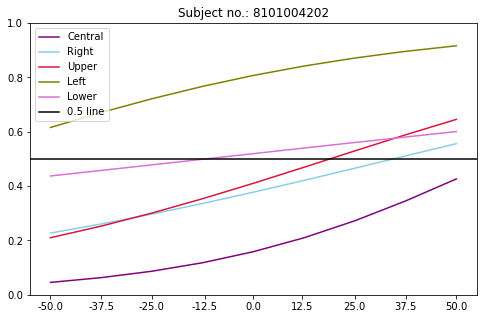

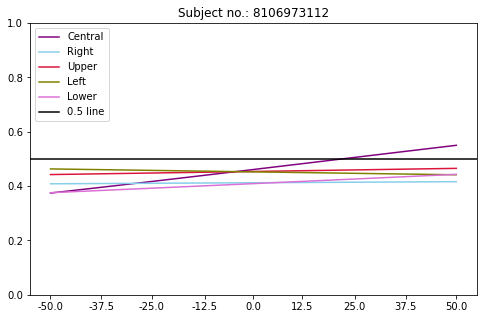

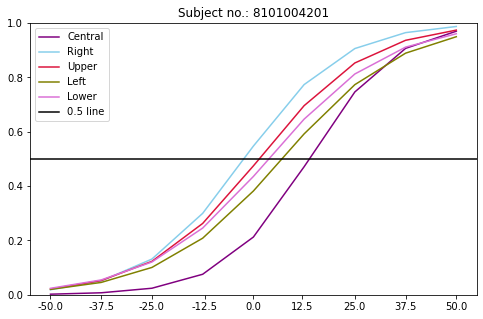

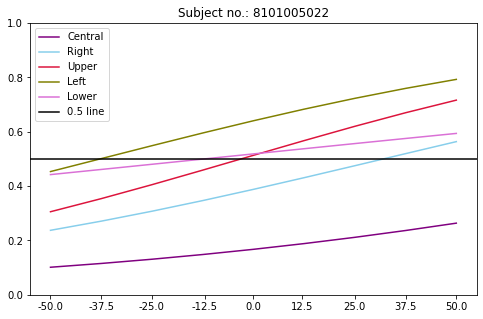

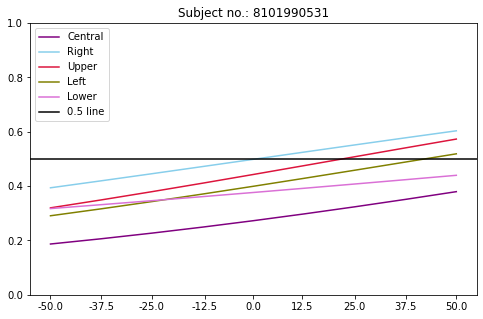

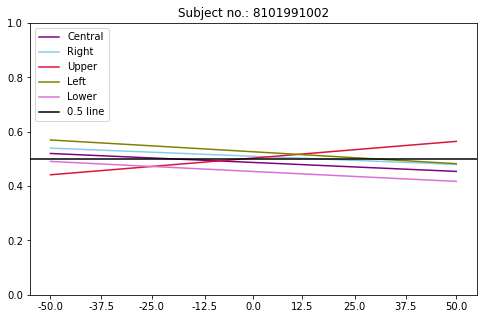

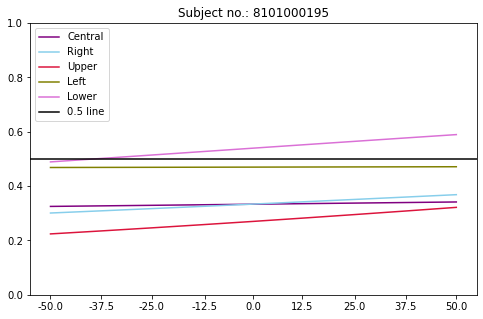

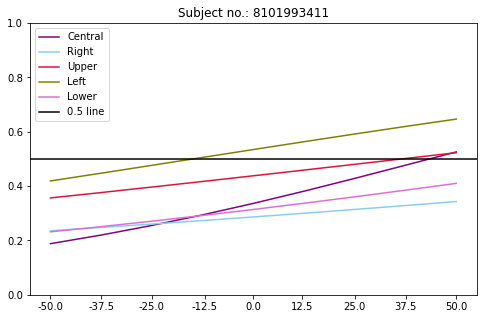

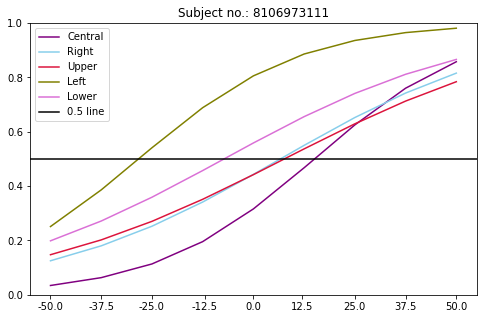

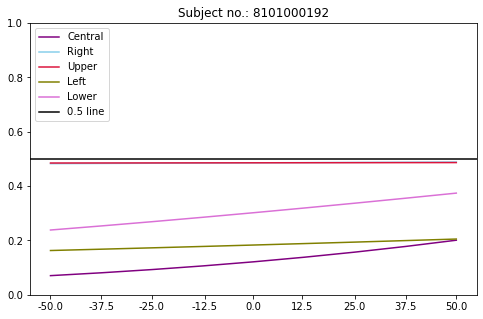

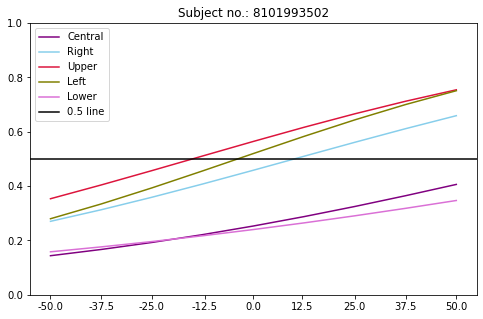

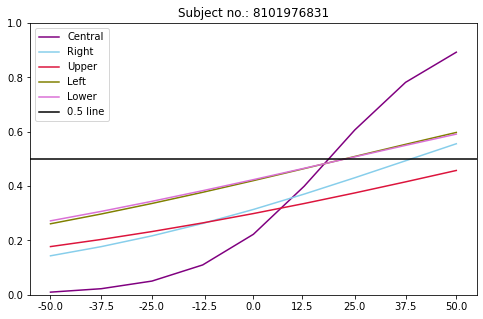

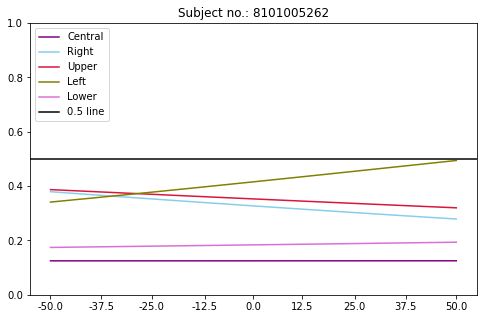

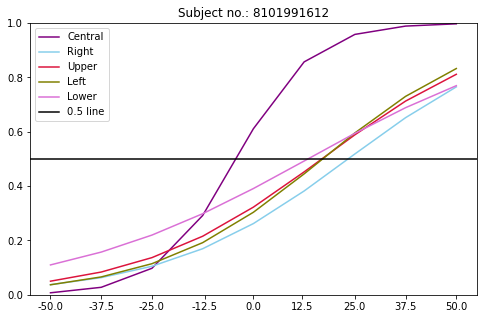

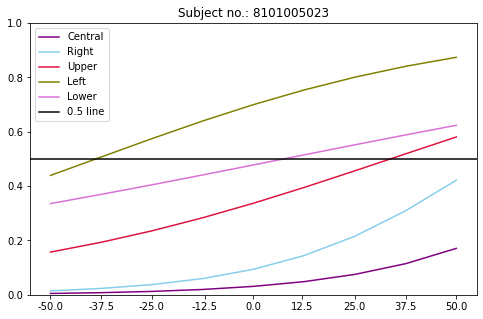

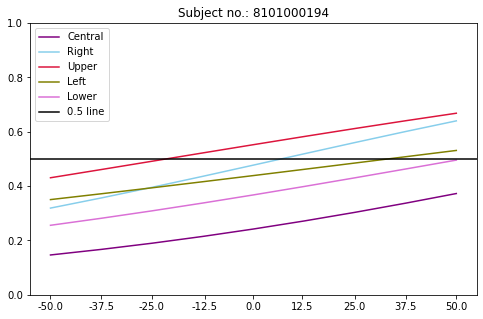

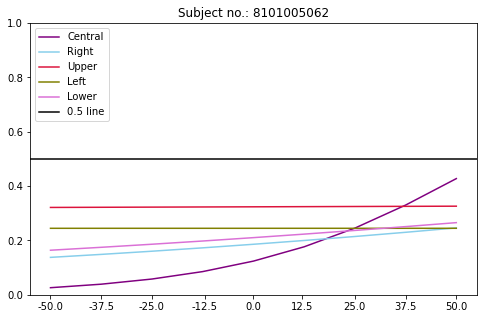

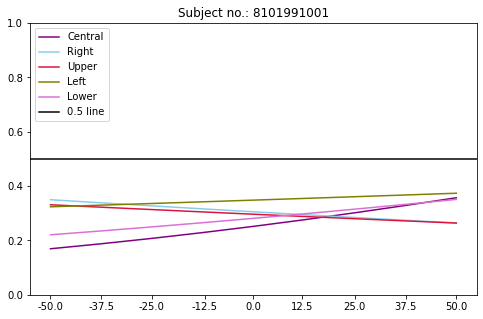

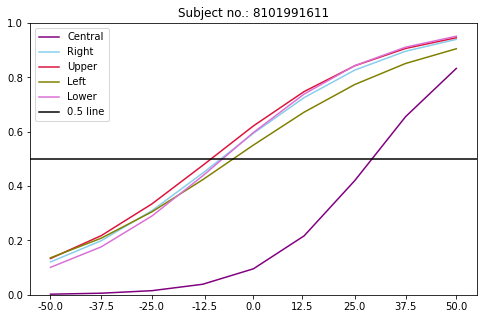

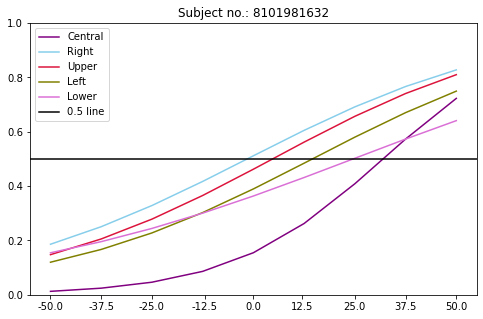

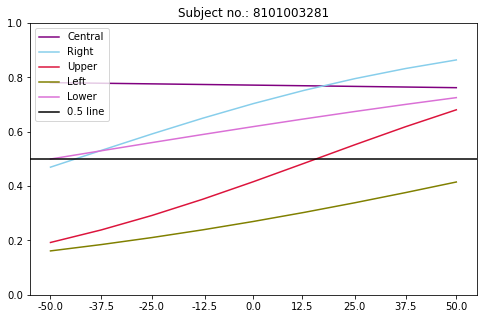

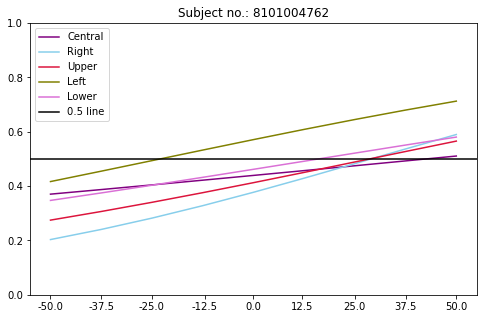

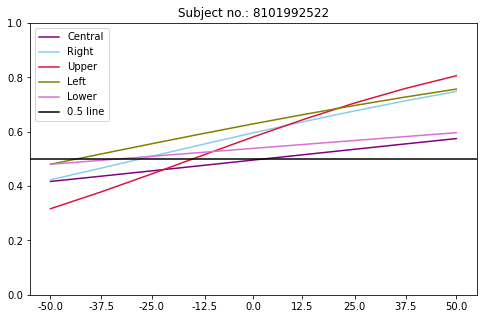

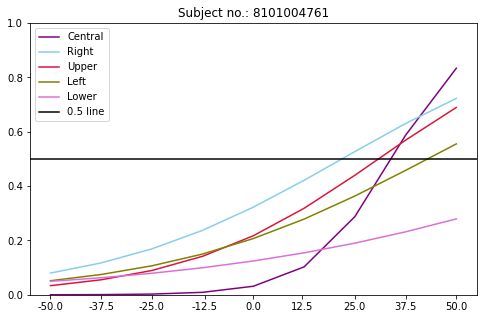

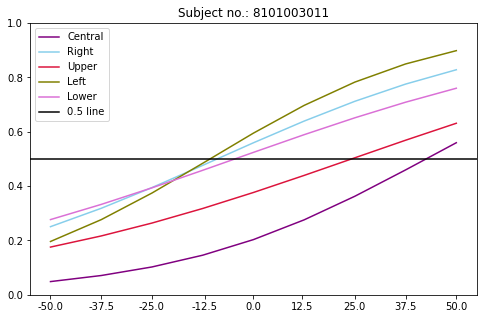

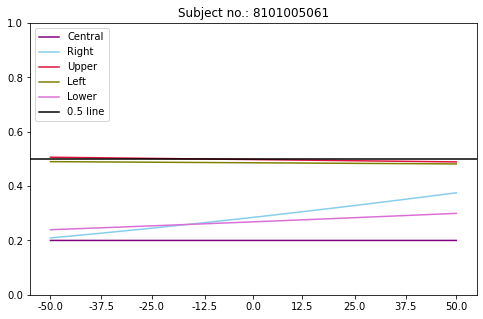

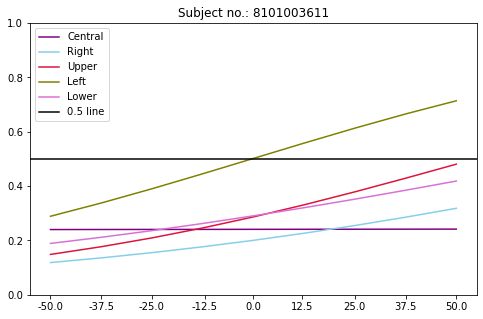

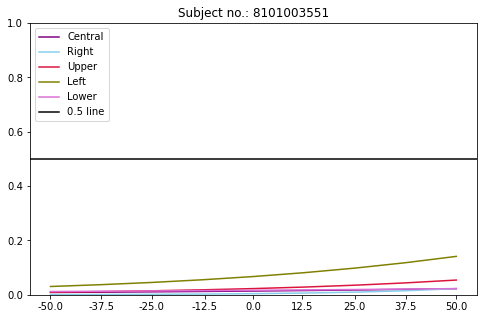

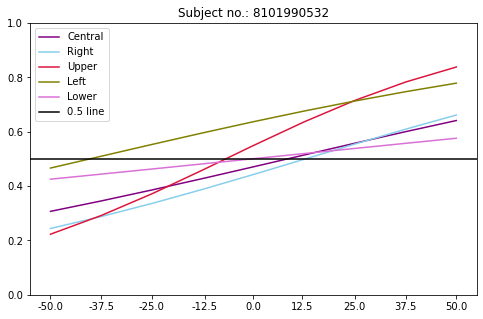

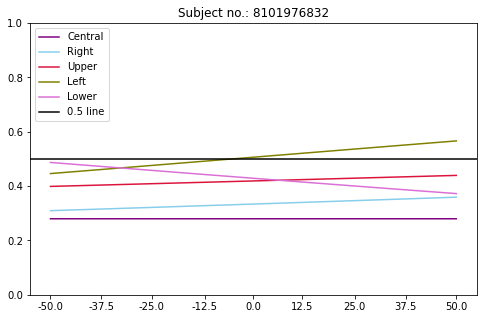

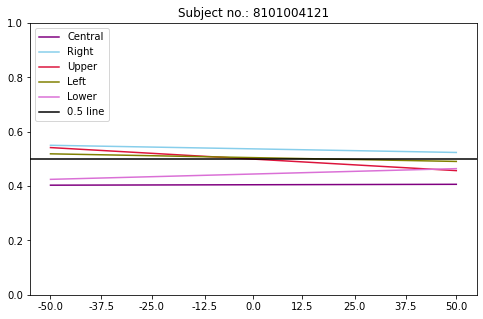

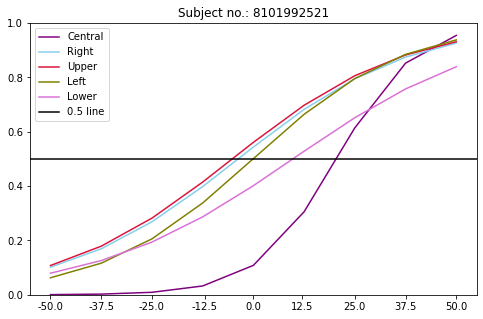

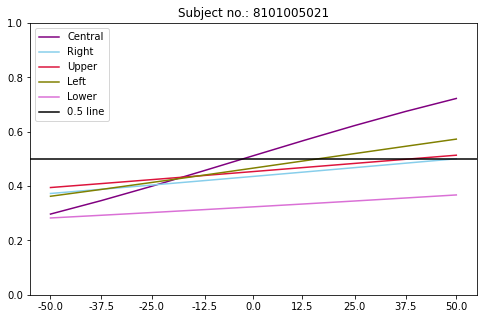

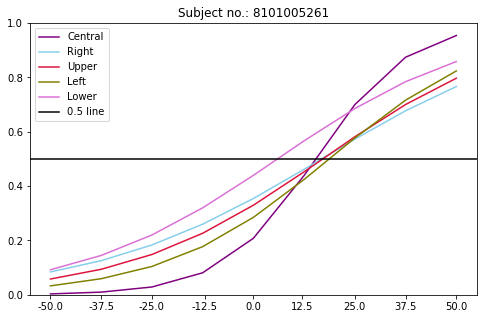

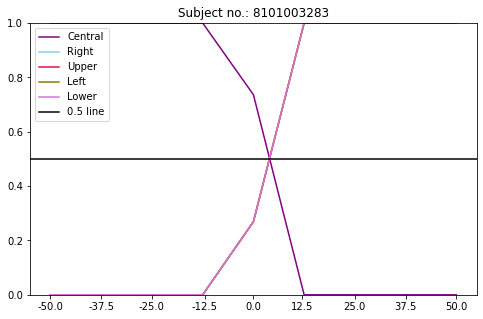

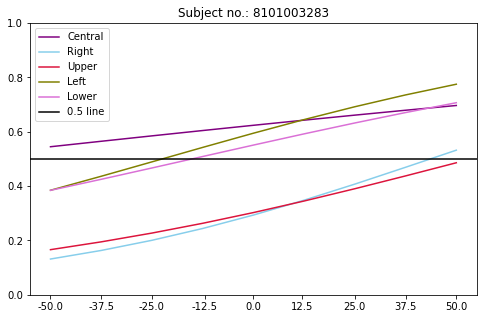

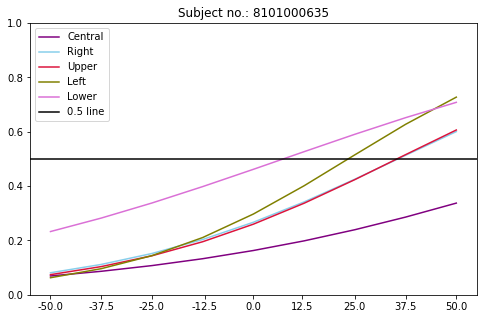

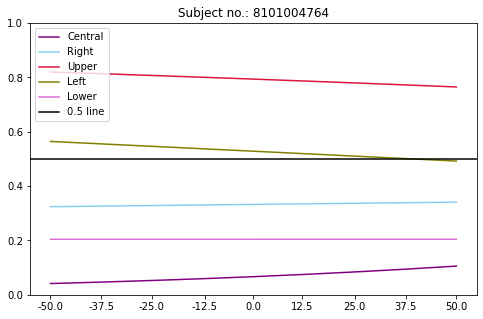

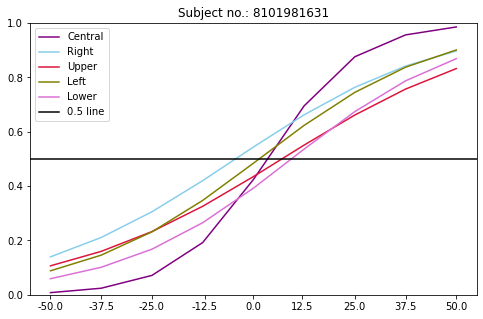

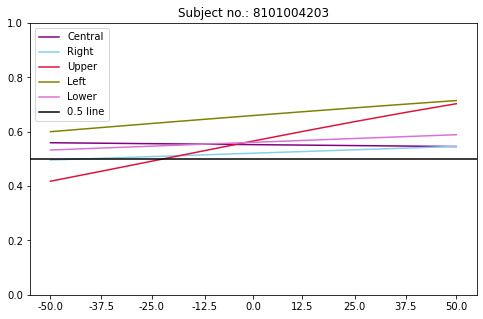

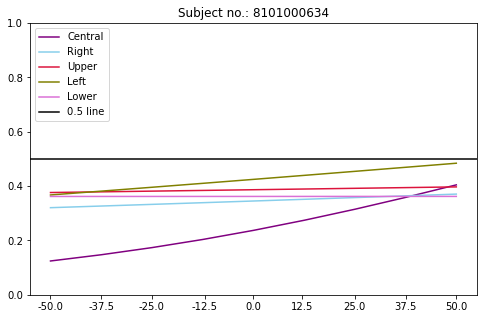

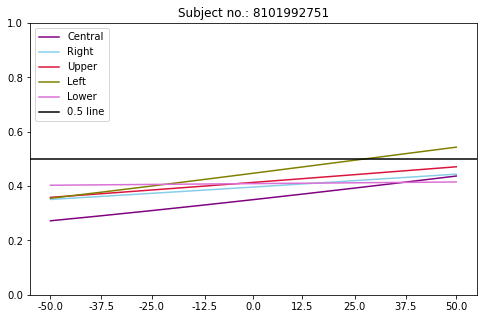

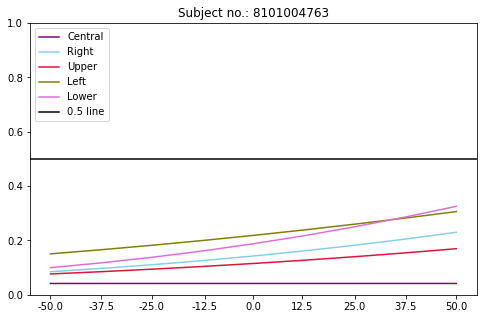

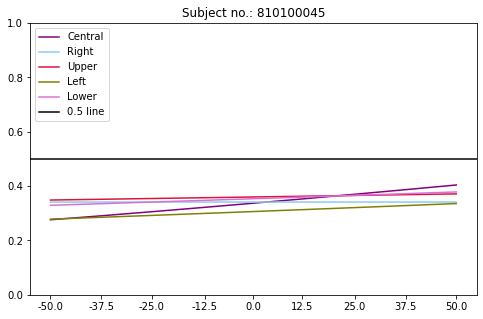

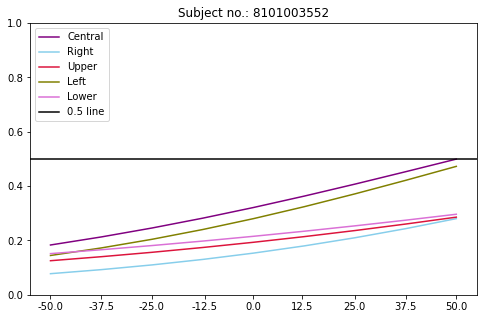

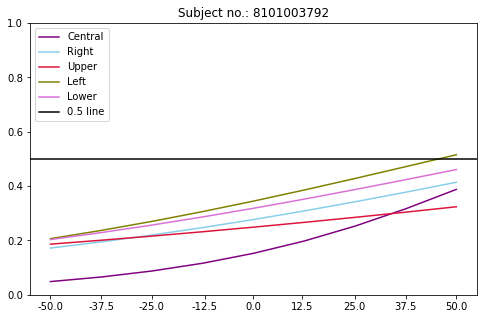

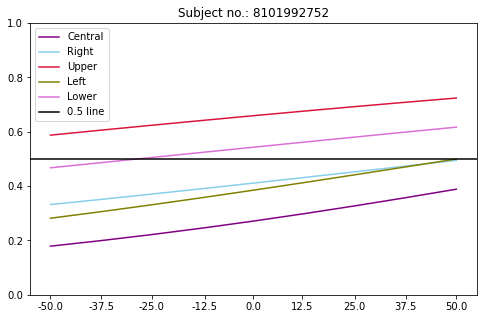

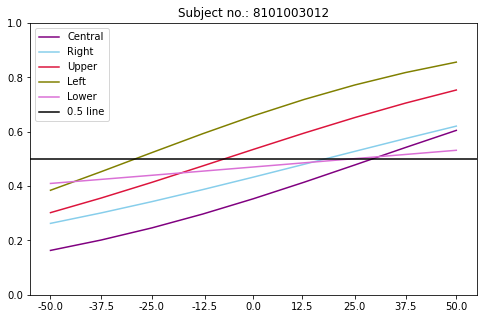

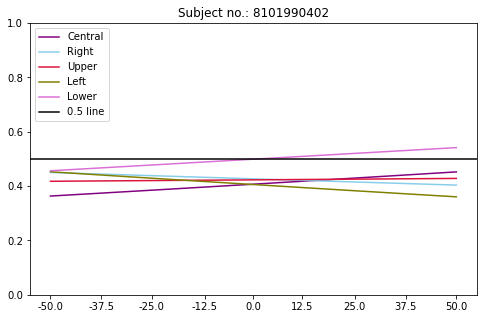

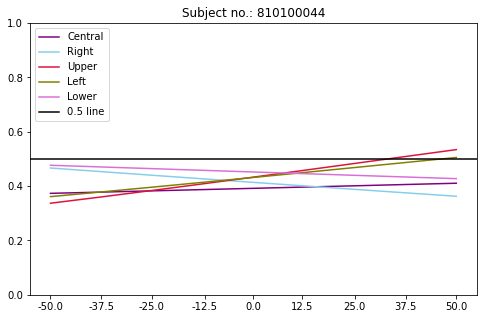

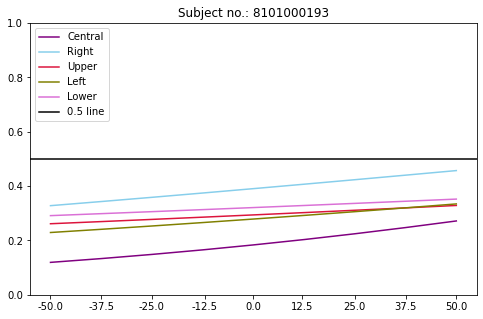

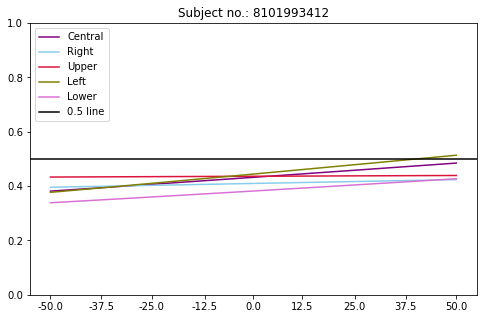

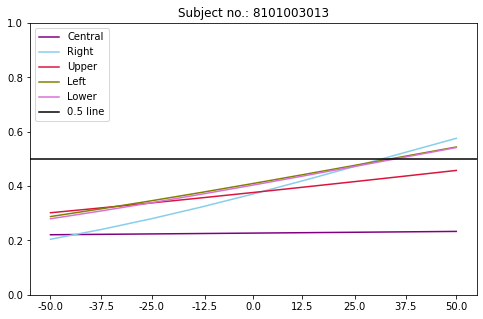

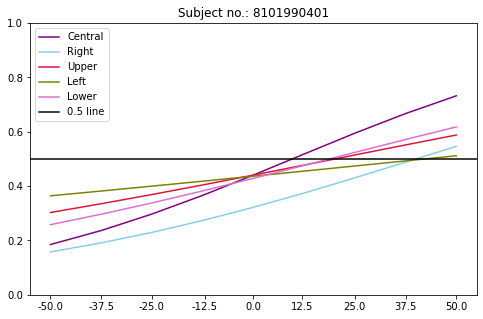

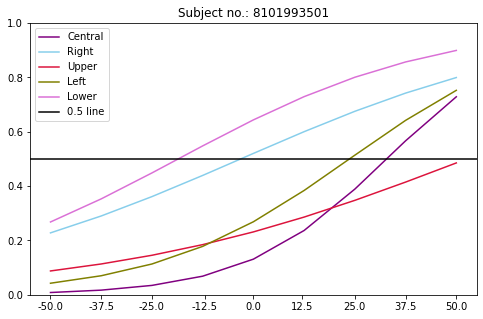

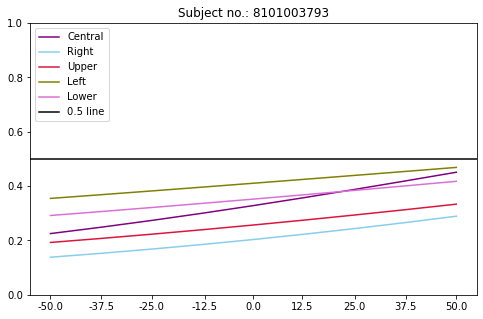

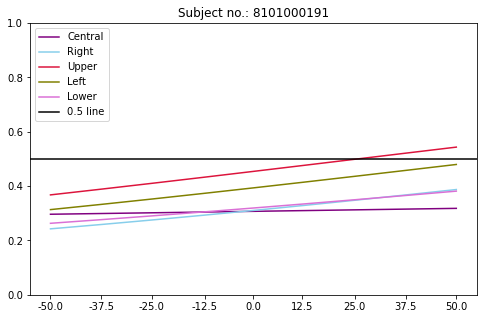

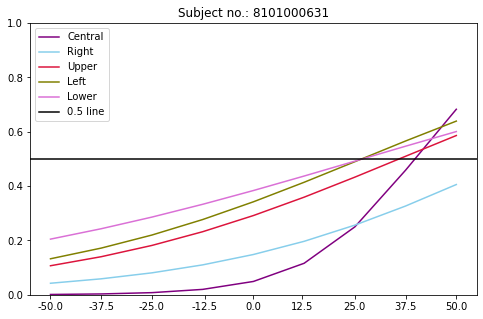

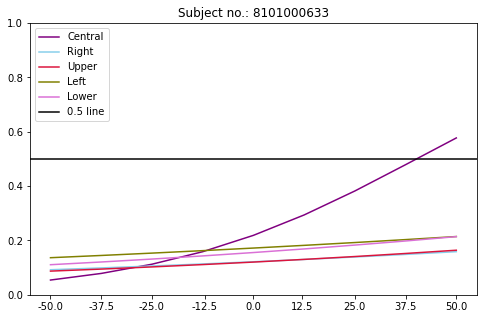

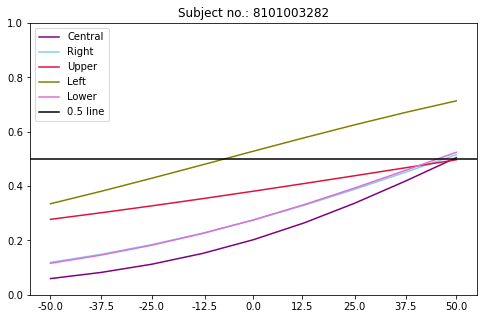

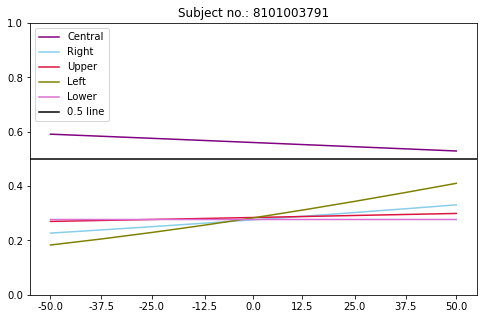

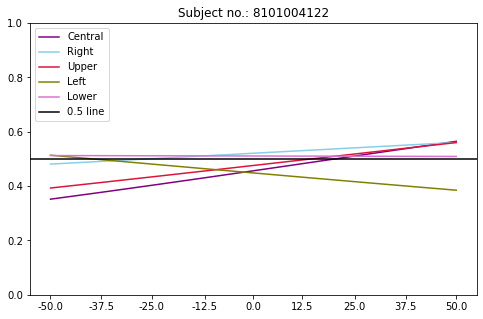

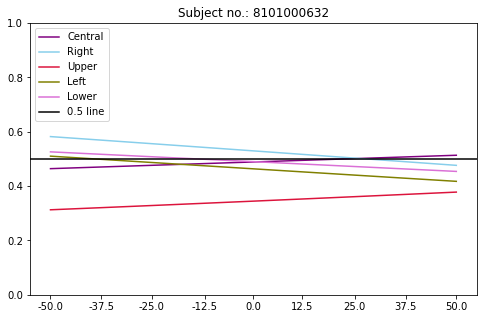

In [64]:
colors=['purple','skyblue','crimson','olive','orchid']
for sb in ls:
    d1 =data_new11.loc[ data_new11['sbj']==sb ,['stm','vf','ans']]
    for i in range(0,5):
        xdata = d1[ d1['vf'] == i]['stm'].to_numpy() 
        ydata = d1[ d1['vf'] == i]['ans'].to_numpy()
        popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000,method='dogbox')
        x = np.linspace(-50, 50, 9) 
        y = sigmoid(x, *popt)
        values = [-50,-37.5,-25,-12,0,12,25,37.5,50] 
        pylab.plot(x,y, label='fit',color=colors[i])
        pylab.ylim(0, 1)
        pylab.xlim(-55, 55)
        pylab.xticks(values,x)
    pylab.title('Subject no.: {}'.format(sb))
    pylab.plot([-55,55],[0.5,0.5],color='black')
    pylab.legend(['Central','Right','Upper','Left','Lower','0.5 line'],loc=2)
    pylab.show()

## 2. PSE of Eccentricity

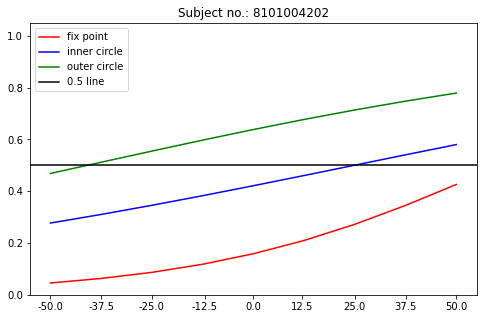

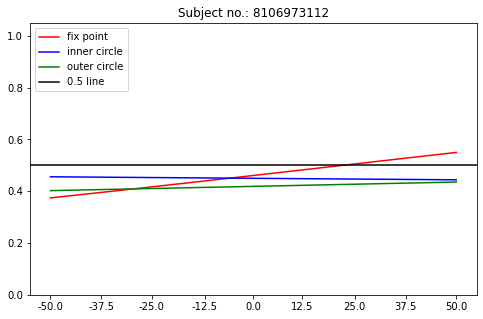

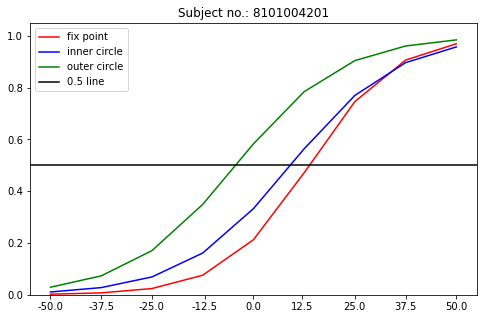

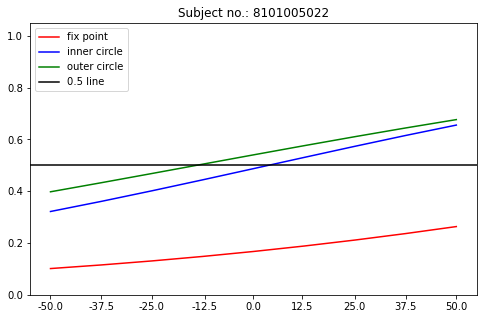

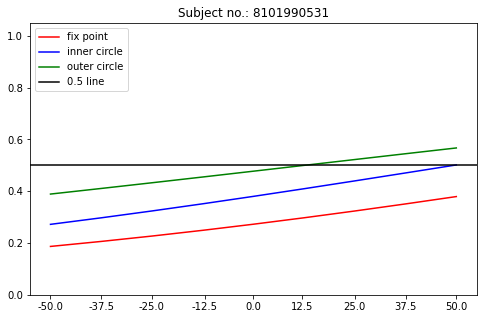

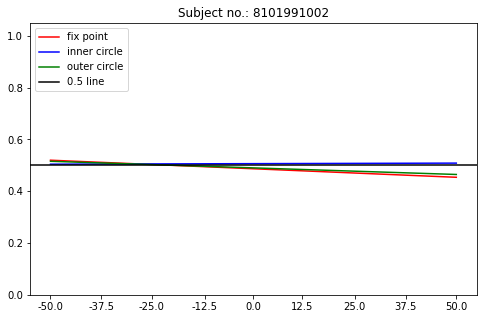

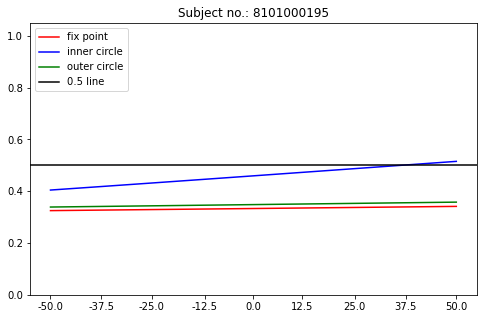

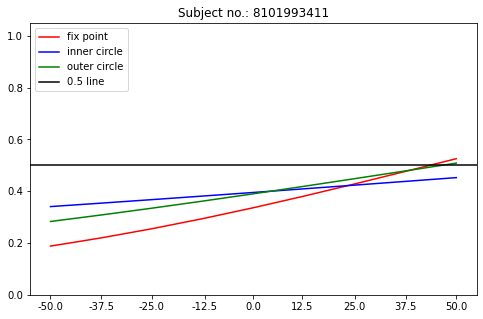

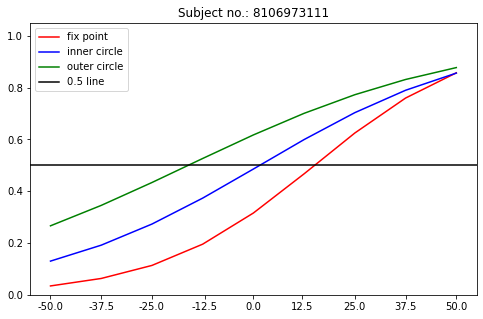

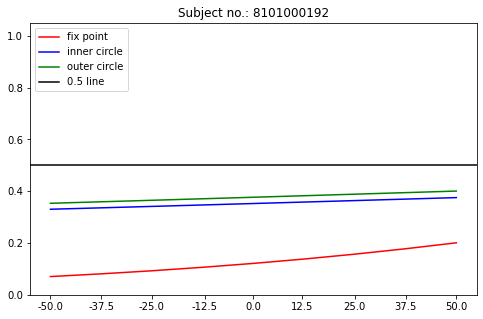

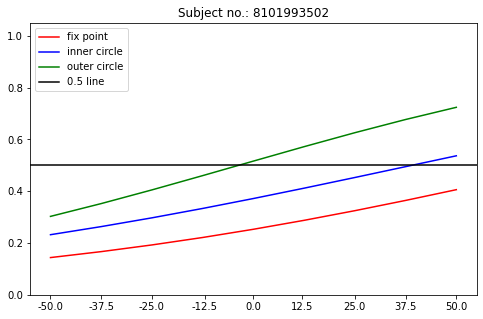

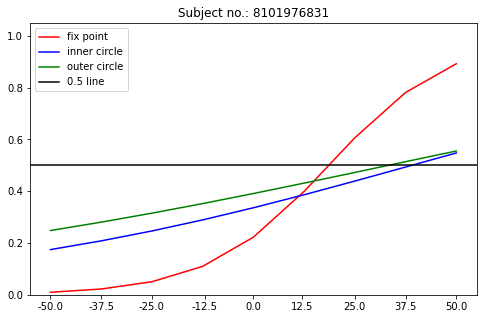

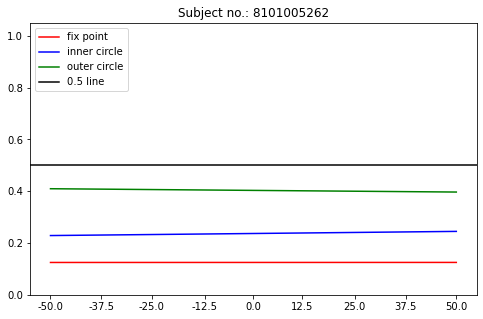

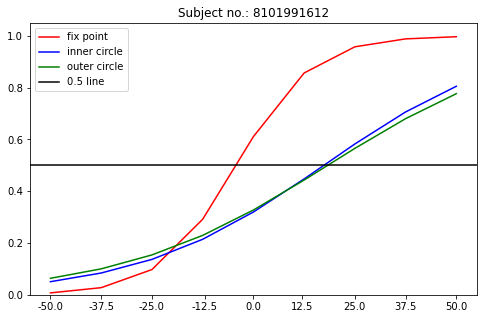

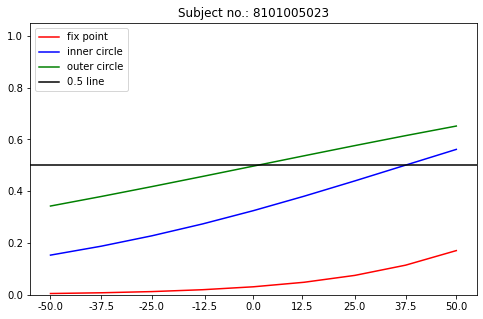

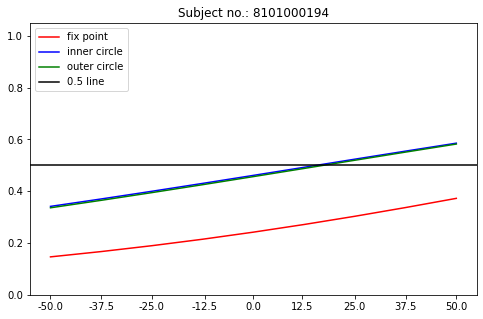

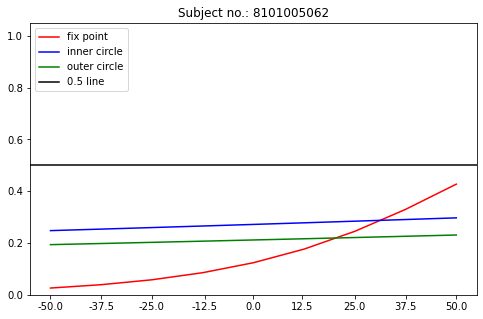

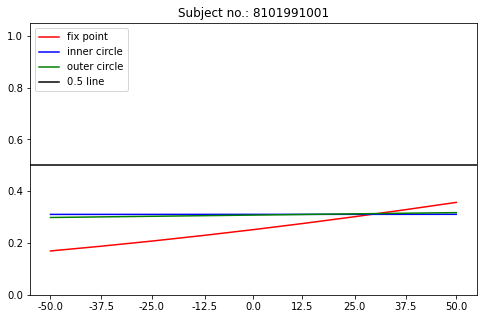

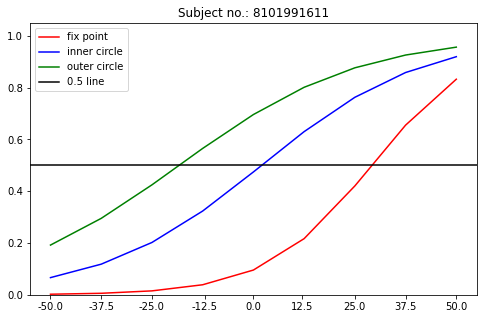

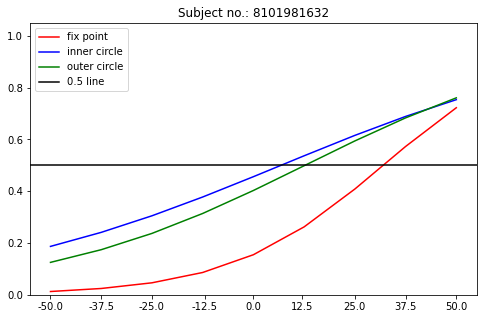

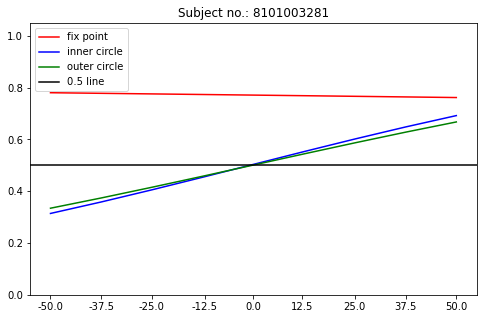

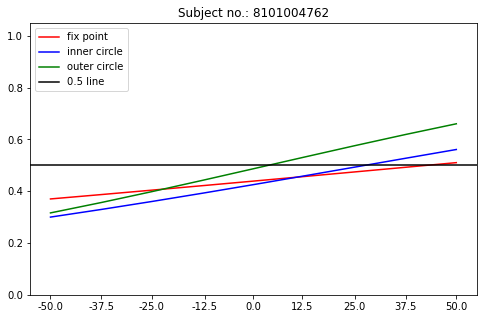

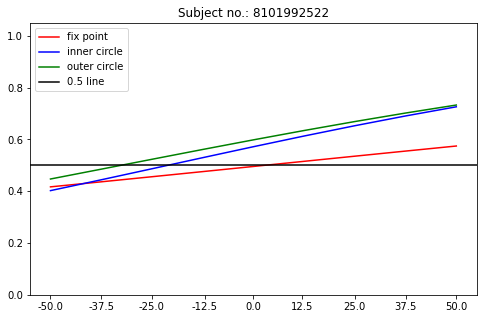

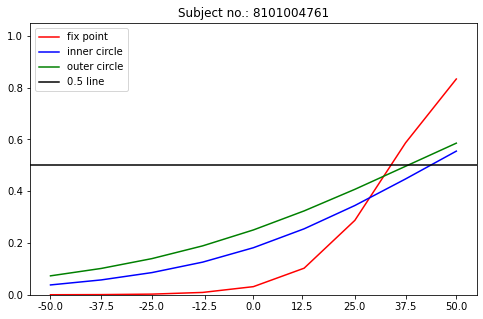

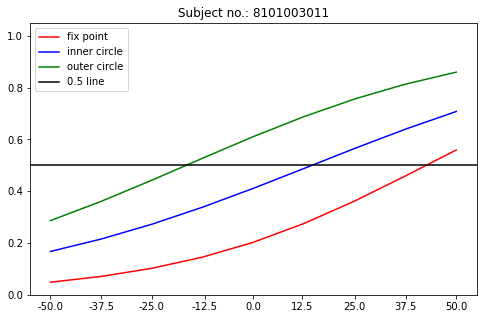

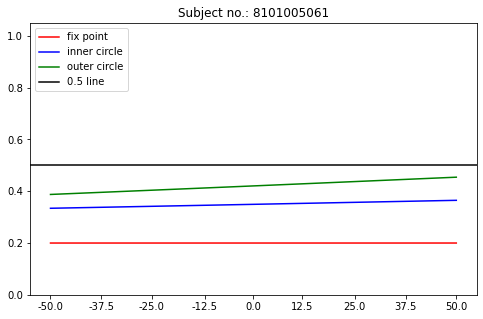

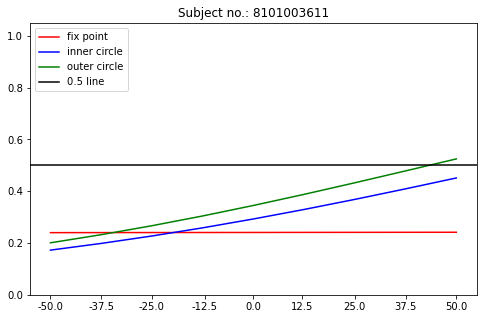

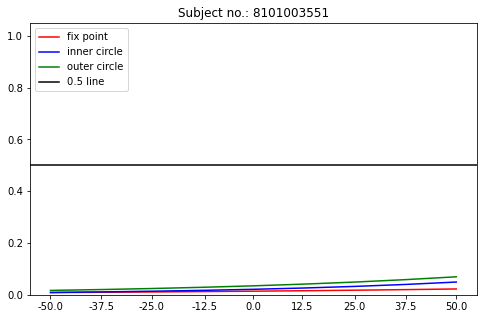

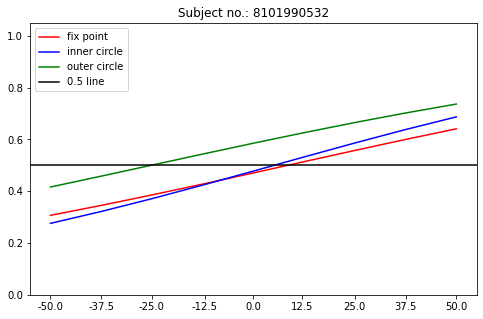

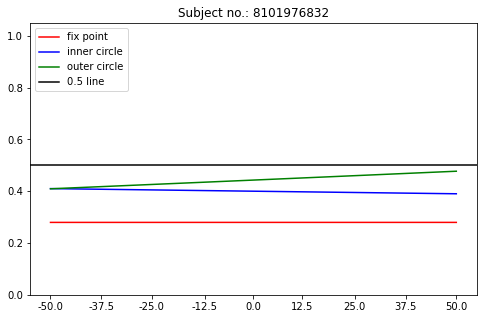

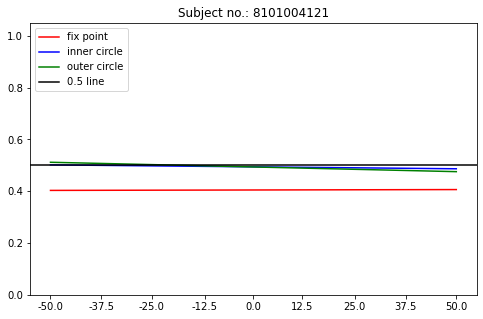

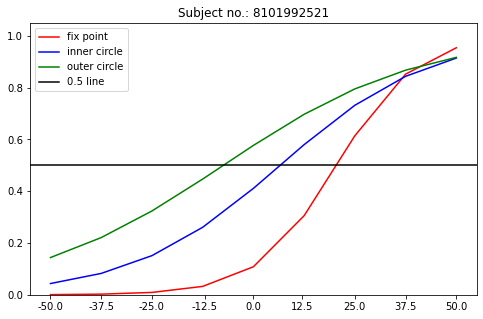

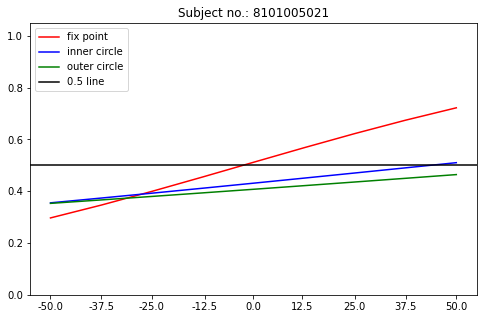

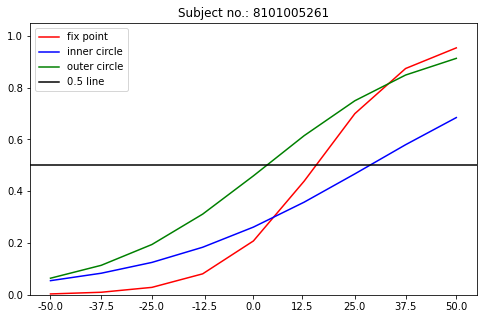

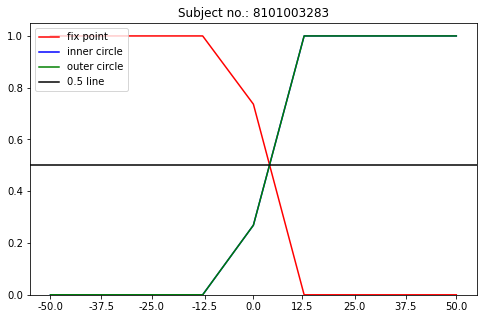

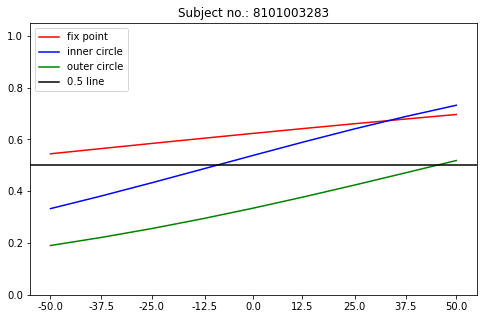

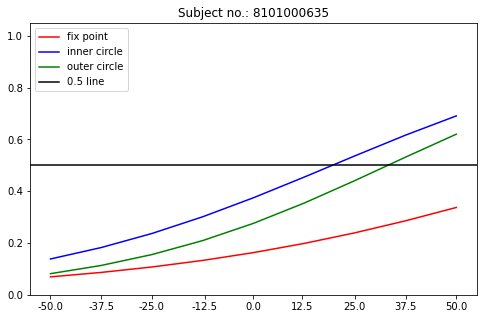

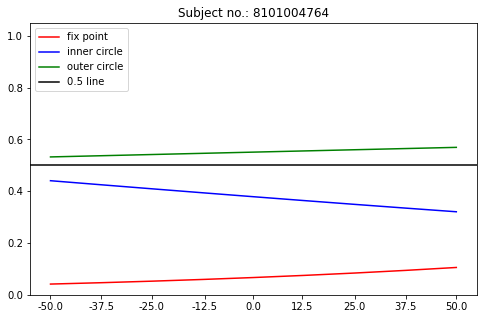

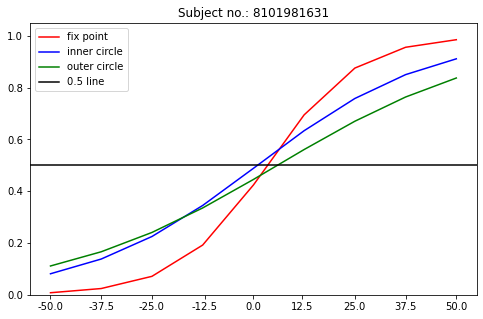

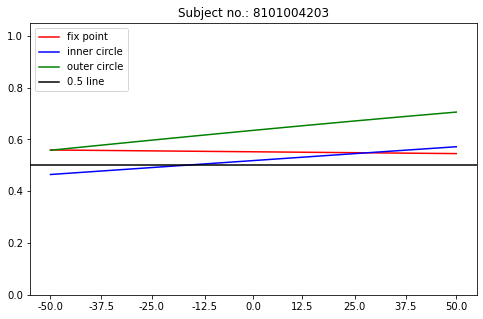

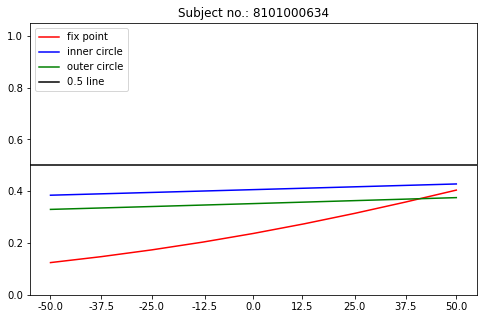

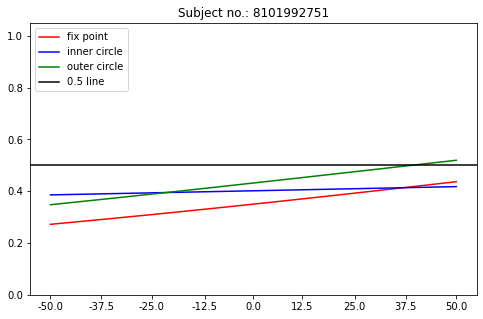

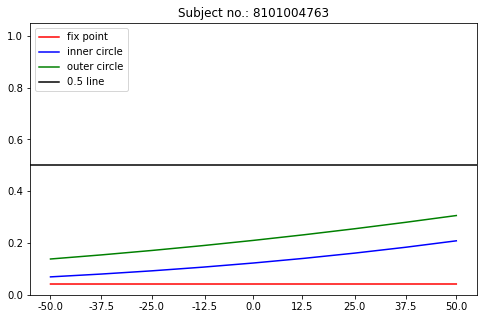

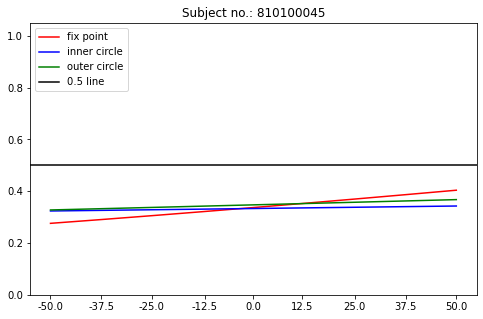

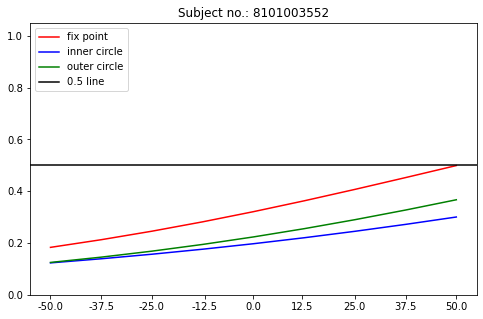

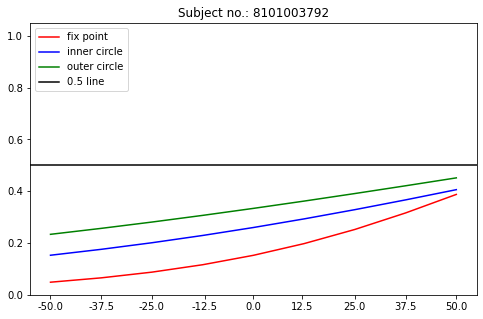

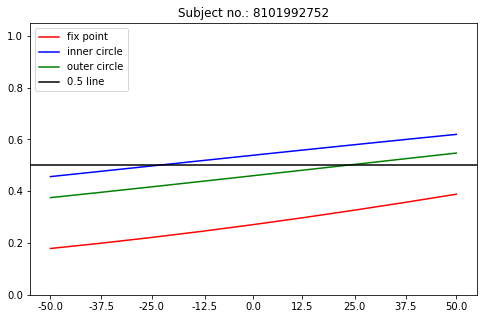

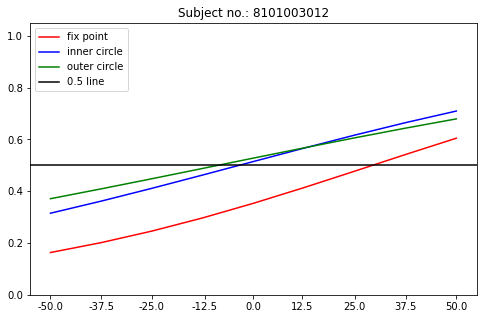

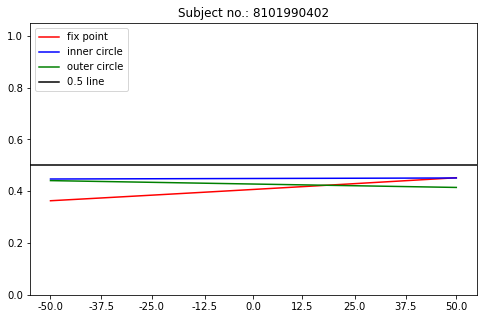

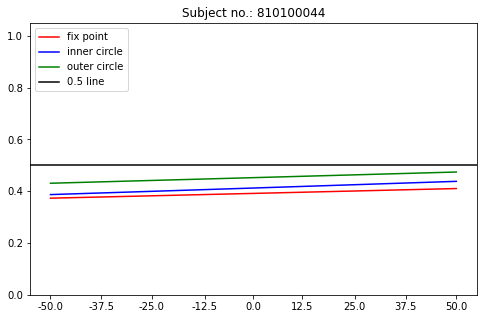

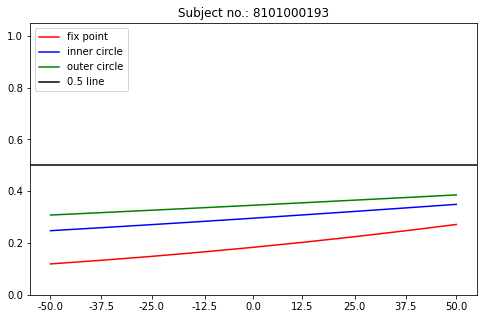

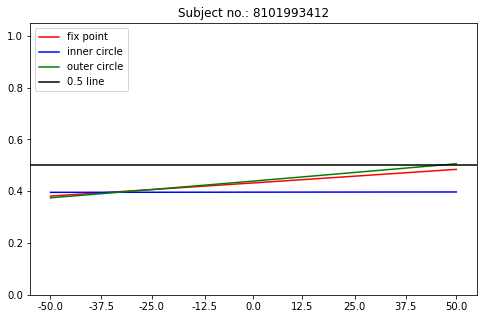

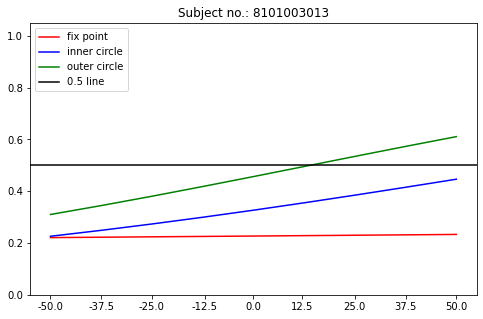

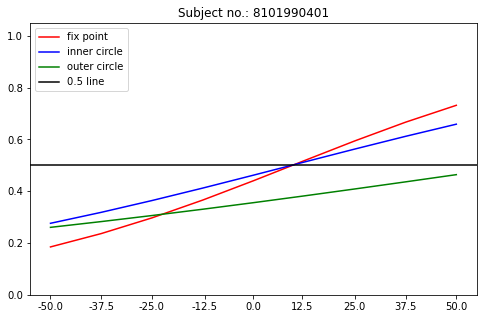

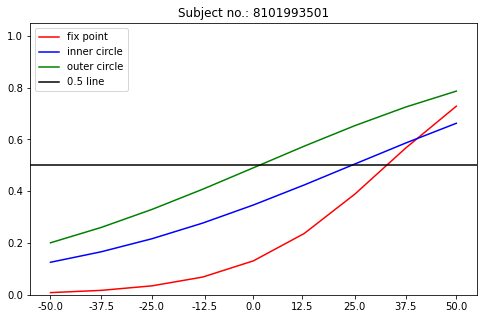

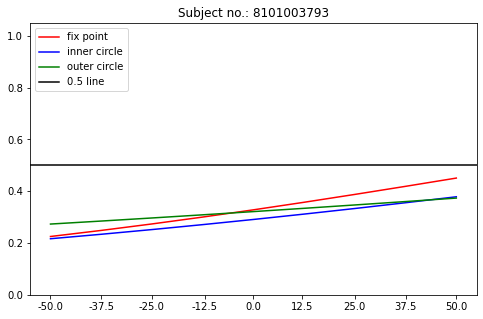

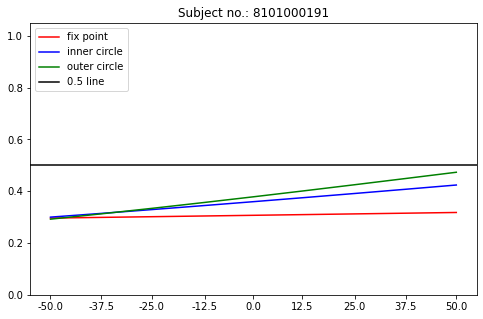

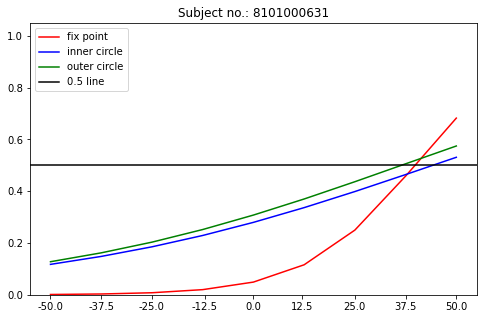

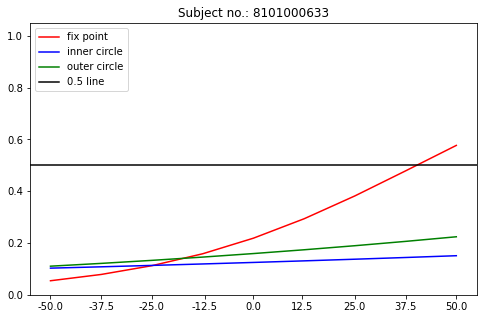

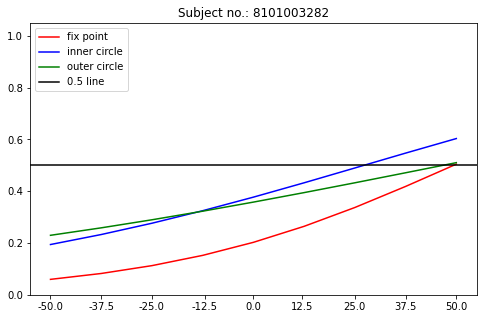

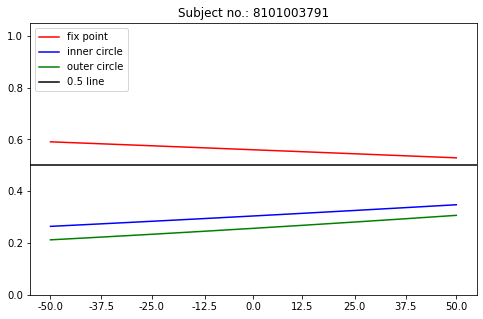

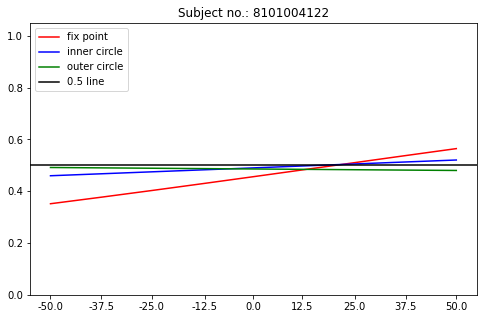

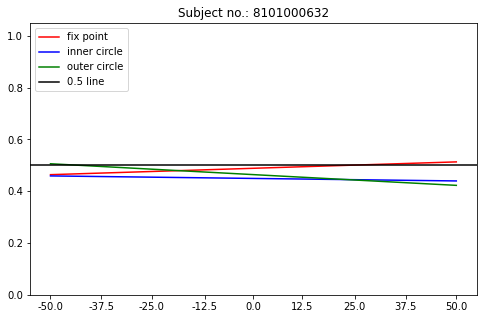

In [65]:
colors=['red','blue','green']
for sb in ls:
    d1 =data_new11.loc[ data_new11['sbj']==sb ,['stm','ecc','ans']]
    for i in range(0,3):
        xdata = d1[ d1['ecc'] == i]['stm'].to_numpy() 
        ydata = d1[ d1['ecc'] == i]['ans'].to_numpy()
        popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000,method='dogbox')
        x = np.linspace(-50, 50, 9) 
        y1 = sigmoid(x, *popt)
        values = [-50,-37.5,-25,-12,0,12,25,37.5,50] 
        pylab.plot(x,y1, label='fit',color= colors[i])
        pylab.ylim(0, 1.05)
        pylab.xlim(-55, 55)
        pylab.xticks(values,x)
    pylab.title('Subject no.: {}'.format(sb))
    pylab.plot([-55,55],[0.5,0.5],color='black')
    pylab.legend(['fix point','inner circle','outer circle','0.5 line'],loc=2)
    pylab.show()


## 3. PSE of Locations

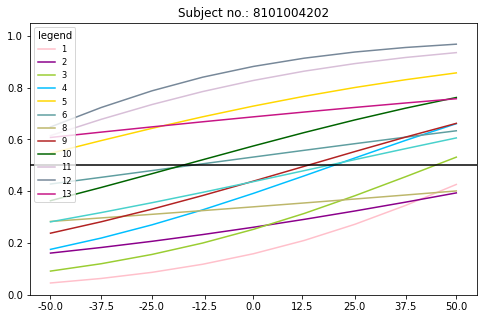

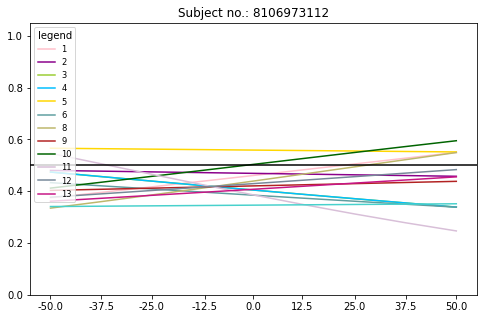

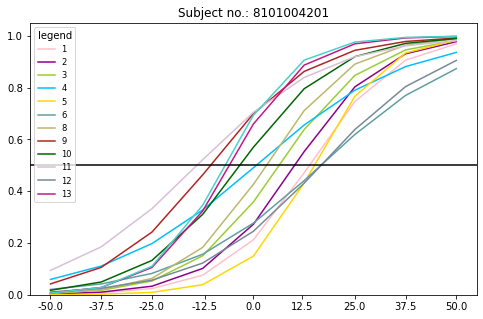

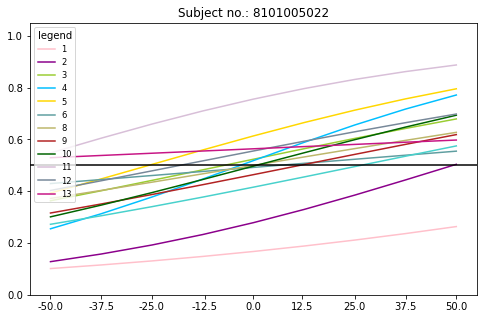

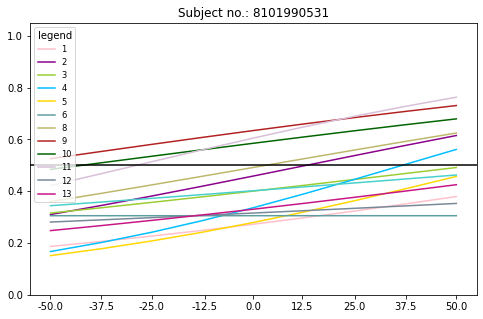

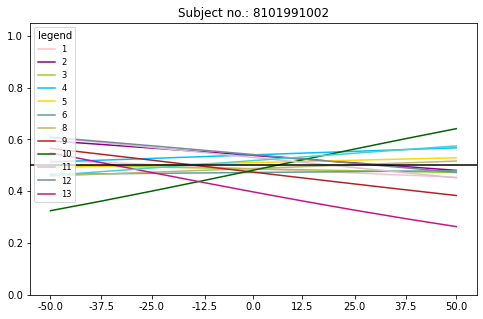

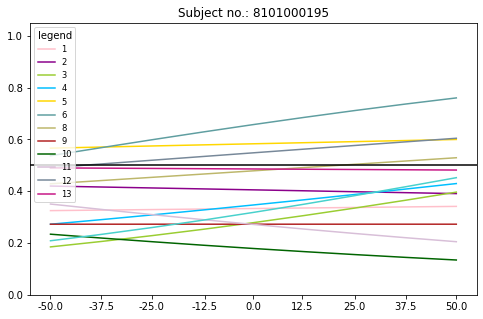

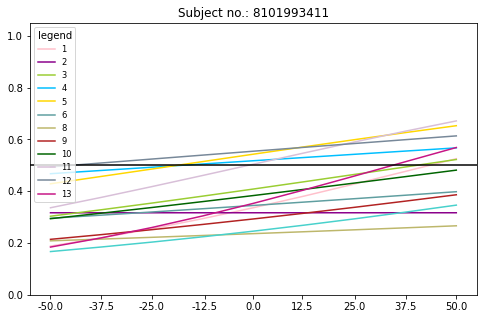

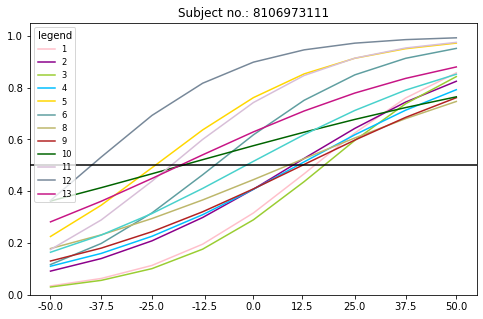

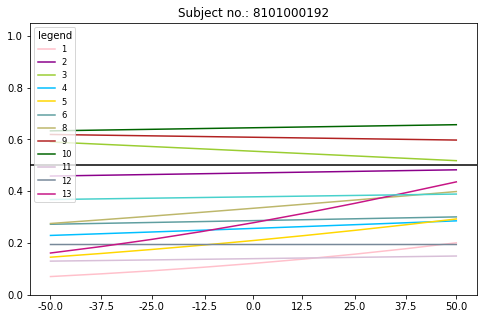

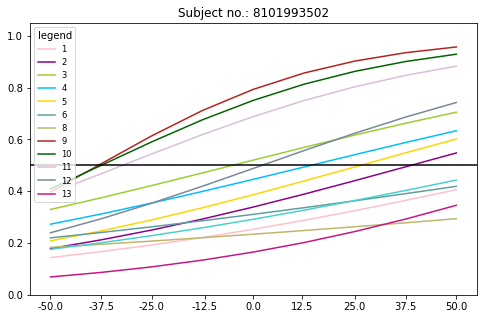

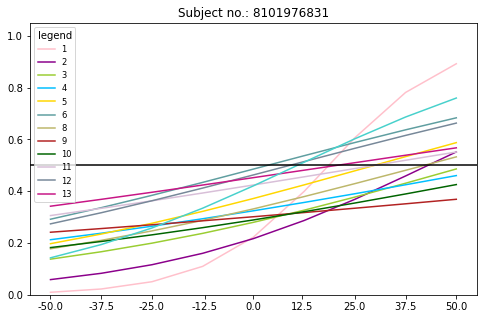

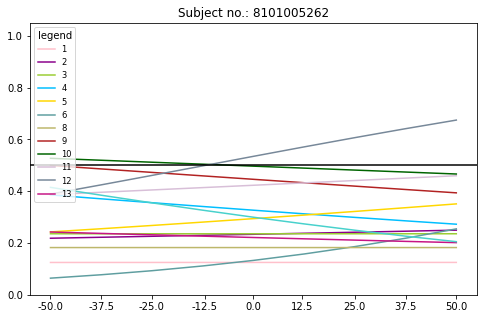

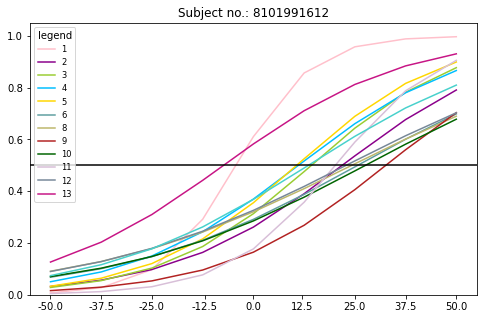

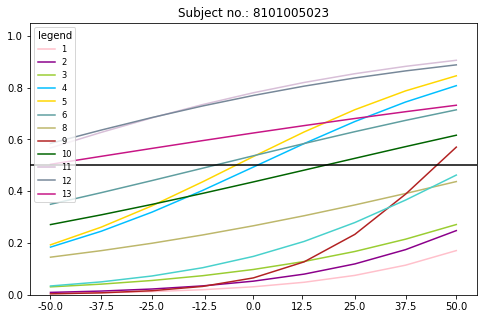

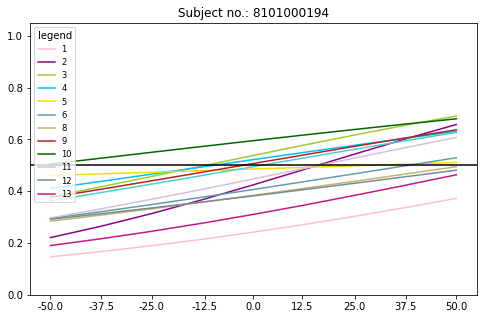

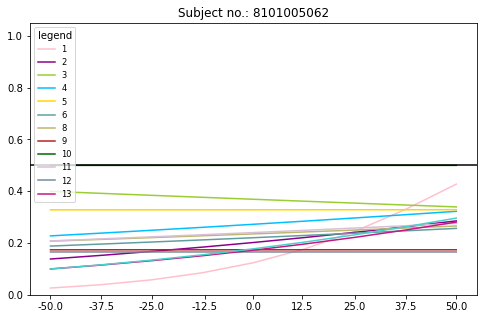

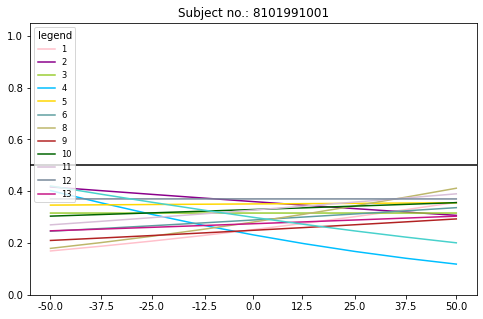

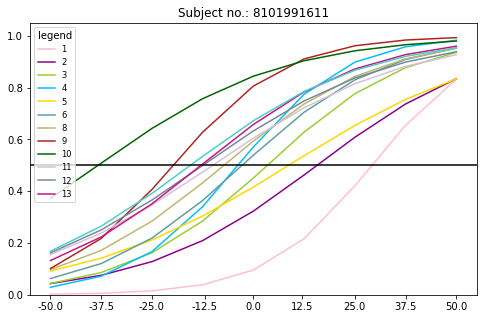

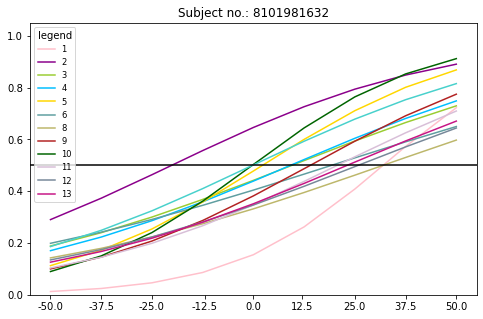

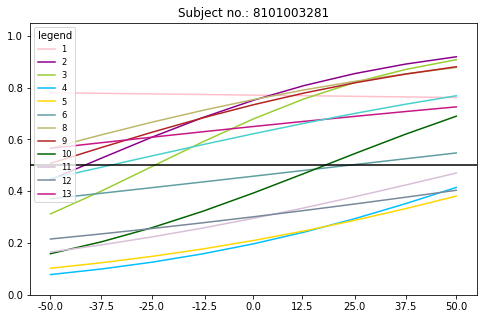

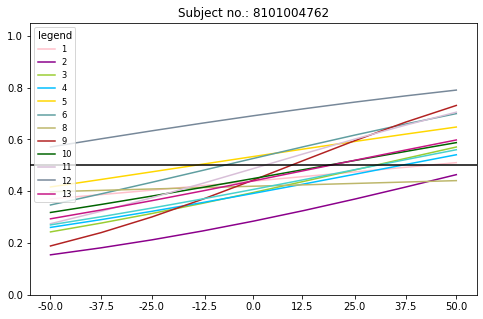

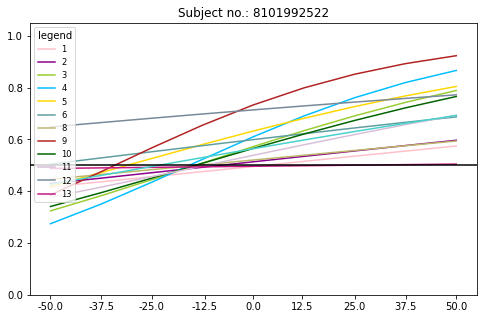

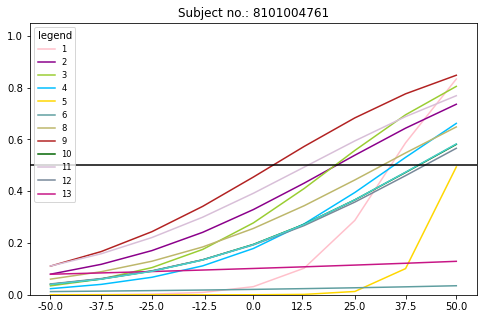

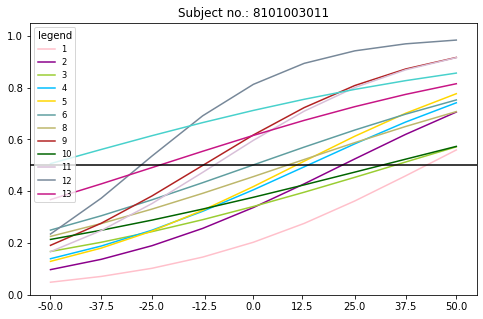

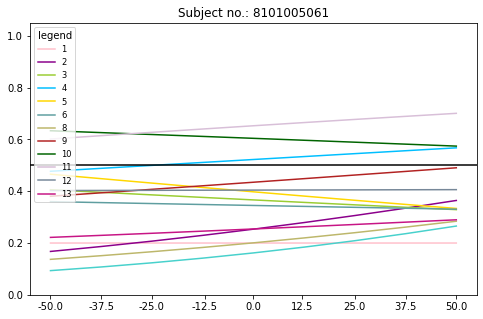

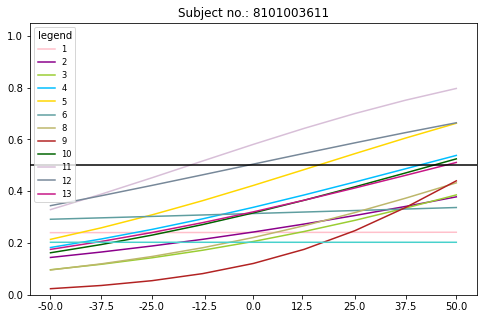

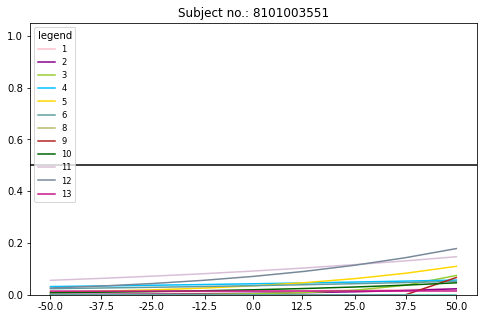

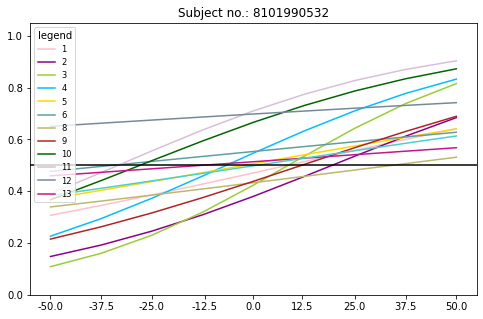

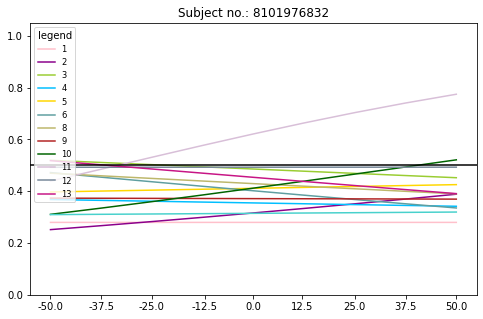

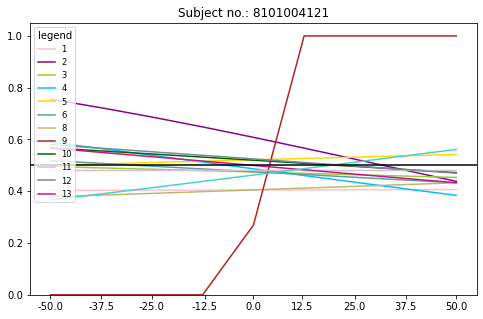

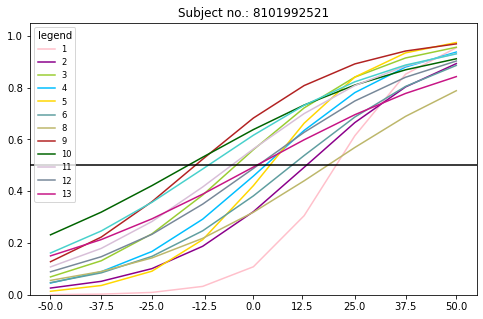

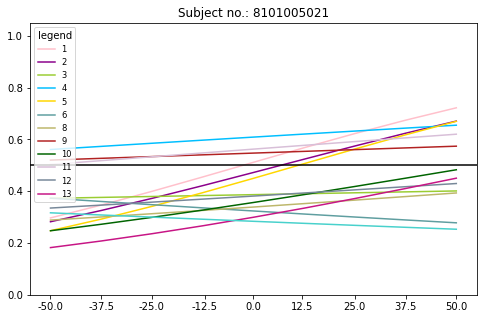

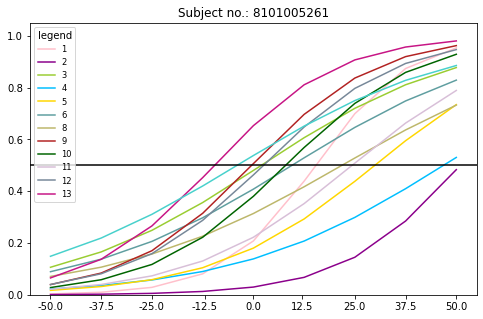

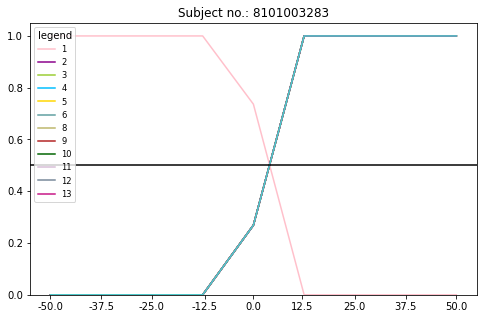

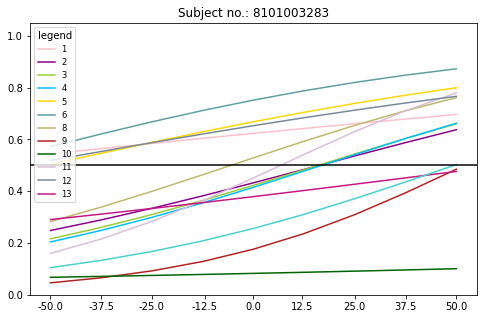

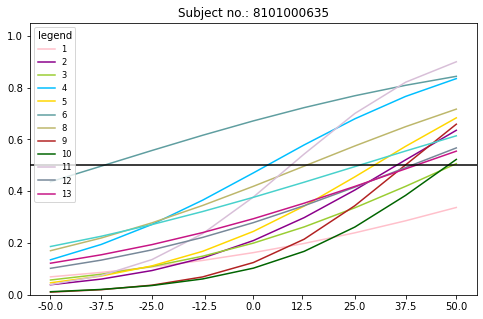

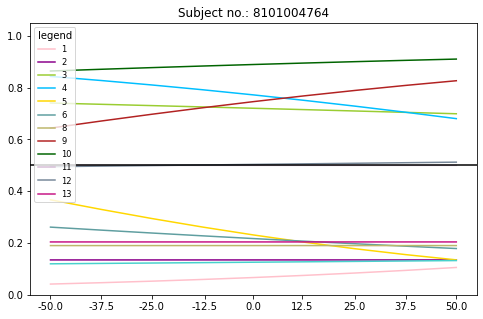

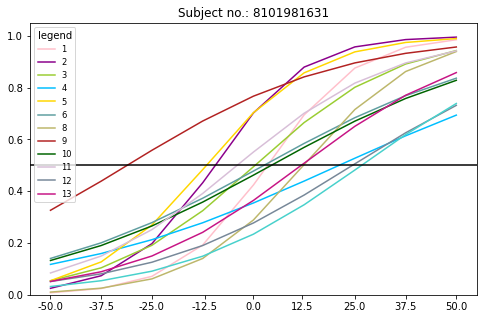

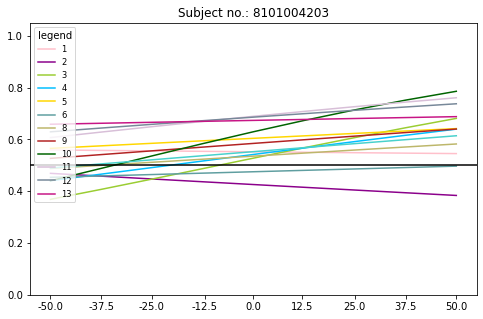

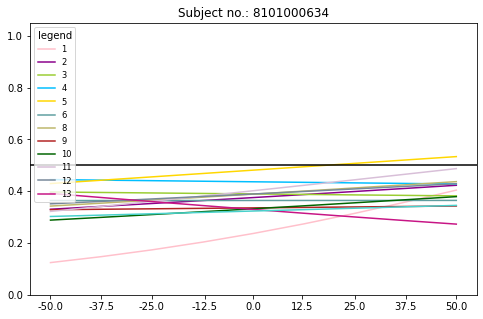

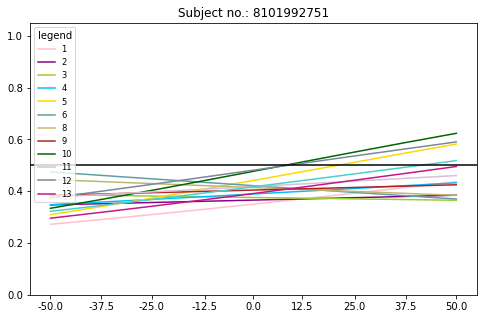

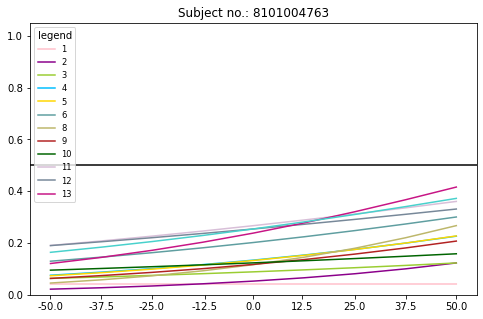

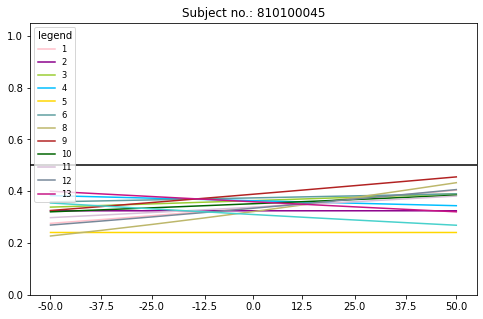

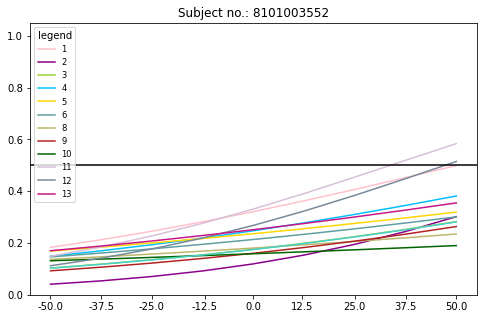

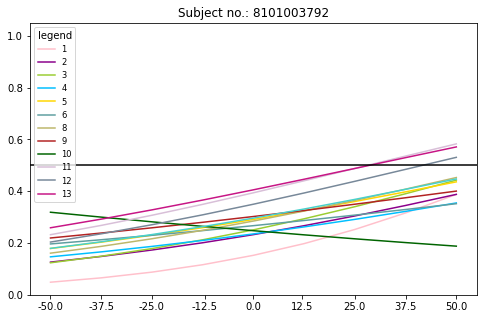

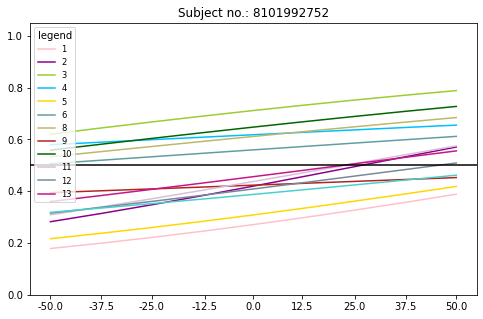

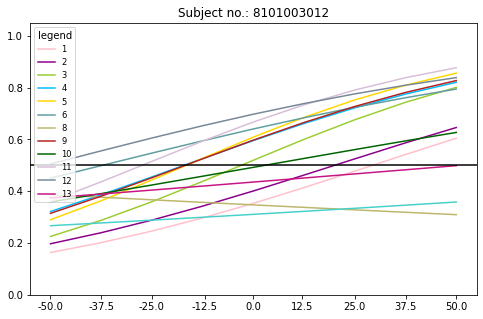

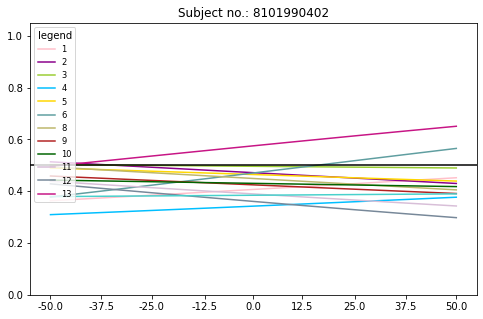

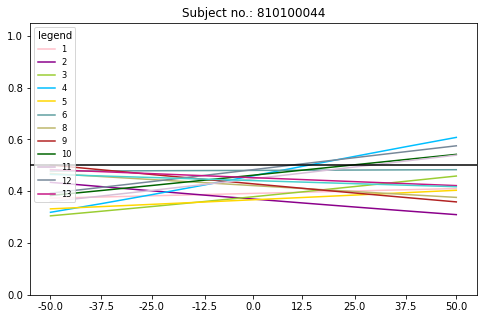

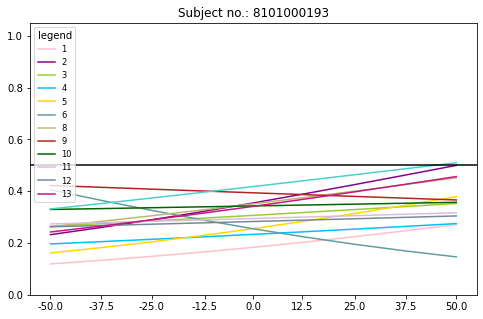

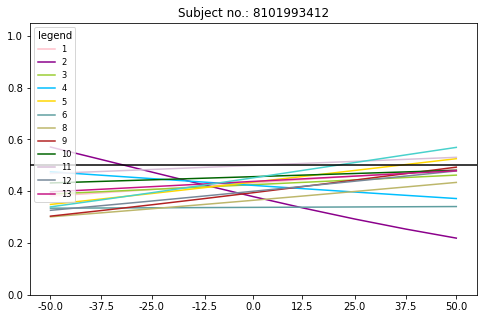

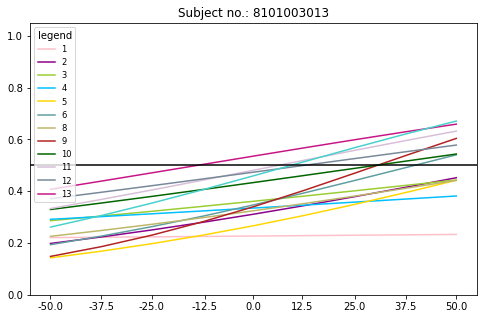

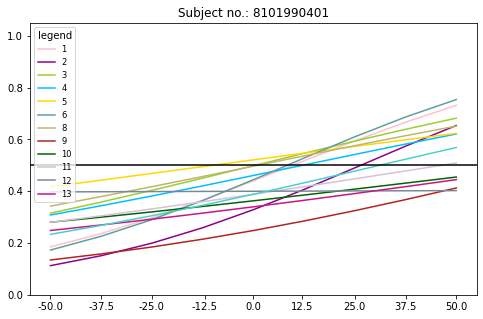

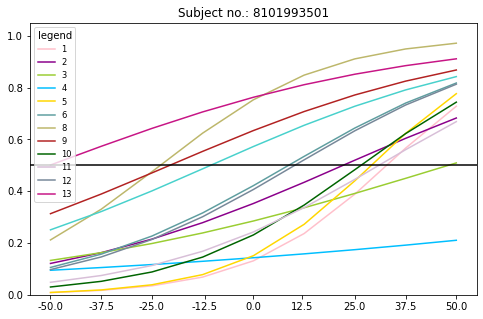

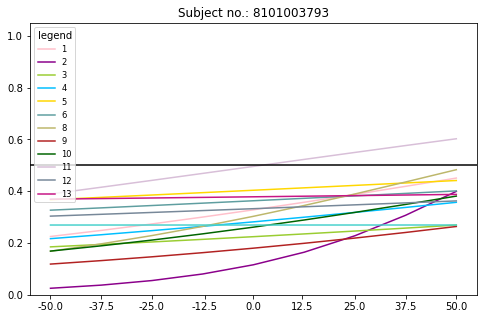

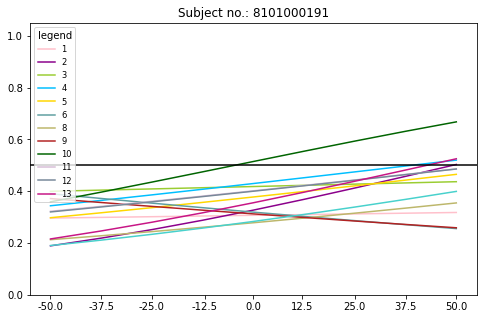

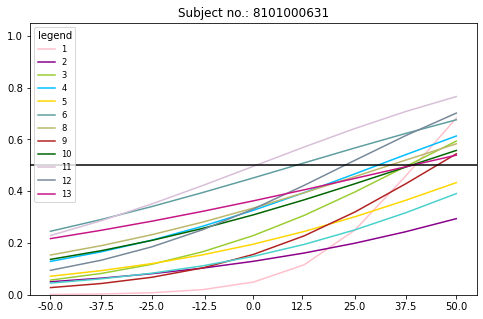

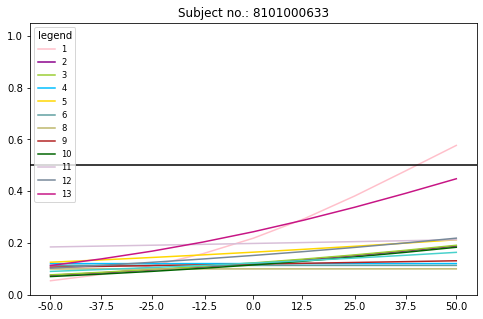

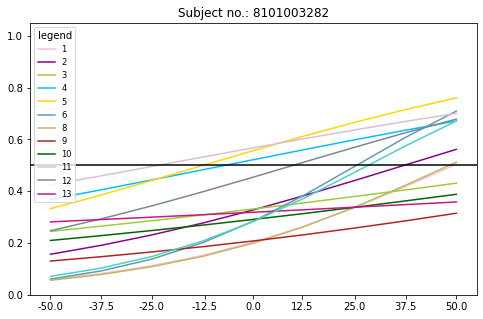

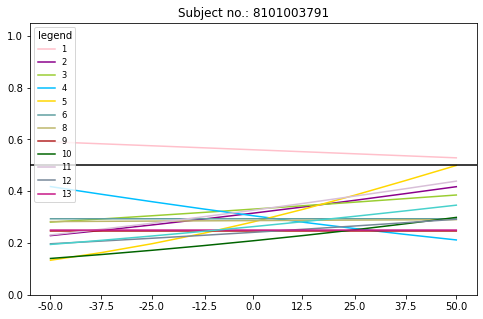

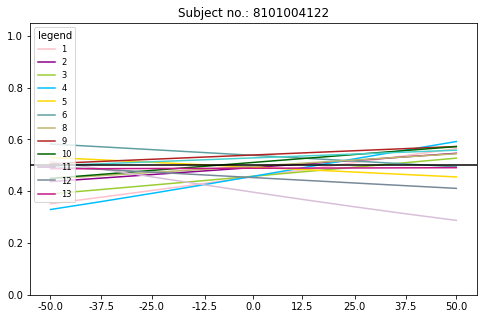

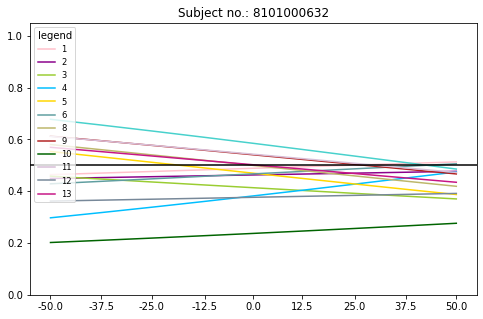

In [66]:
colors=['pink','darkmagenta','yellowgreen','deepskyblue','gold','cadetblue','darkkhaki','firebrick','darkgreen','thistle','lightslategrey','mediumvioletred','mediumturquoise']
for sb in ls:
    d1 =data_new11.loc[ data_new11['sbj']==sb ,['stm','pos','ans']]
    for i in range(1,14):
        xdata = d1[ d1['pos'] == i]['stm'].to_numpy() 
        ydata = d1[ d1['pos'] == i]['ans'].to_numpy()
        try:
            popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000,method='dogbox')
        except:
            print("")
        x = np.linspace(-50, 50, 9) 
        y = sigmoid(x, *popt)
        values = [-50,-37.5,-25,-12,0,12,25,37.5,50] 
        pylab.plot(x,y, label='fit',color=colors[i-1])
        pylab.ylim(0, 1.05)
        pylab.xlim(-55, 55)
        pylab.xticks(values,x)
    pylab.title('Subject no.: {}'.format(sb))
    pylab.plot([-55,55],[0.5,0.5],color='black')
    pylab.legend(['1','2','3','4','5','6','8','9','10','11','12','13'], title="legend",loc=2, fontsize='small', fancybox=True)
    pylab.show()

# Calculating PSE for each subject

In [68]:
from shapely.geometry import Point, LineString

## 1. PSE of Visual Field

In [130]:
PSE_vf = [[],[],[],[],[]]
for sb in ls:
    d1 =data_new11.loc[data_new11['sbj']==sb ,['stm','vf','ans']]
    for i in range(0,5):
        xdata = d1[ d1['vf'] == i]['stm'].to_numpy()
        ydata = d1[ d1['vf'] == i]['ans'].to_numpy()
        try:
            popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000,method='dogbox')
        except:
            print("")
        x = np.linspace(-55, 55, 9)
        y1 = sigmoid(x, *popt)
        y2 = np.array([0.5]* len(x))

        first_line = LineString(np.column_stack((x, y1)))# PSE curve
        second_line = LineString(np.column_stack((x, y2)))# the 0.5 line
        intersection = first_line.intersection(second_line)# finding their intersection(if they intersect)

        x_in, y_in = intersection.xy
        try:
            PSE_vf[i].append(x_in[0])
        except:
            print("They don't intersect", end=",")
print()
print(PSE_vf)

They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't in

## 2. PSE of Eccentricity

In [186]:
PSE_ecc = [[],[],[]]
for sb in ls:
    d1 =data_new11.loc[data_new11['sbj']==sb ,['stm','ecc','ans']]
    for i in range(0,3):
        xdata = d1[ d1['ecc'] == i]['stm'].to_numpy()
        ydata = d1[ d1['ecc'] == i]['ans'].to_numpy()
        try:
            popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000,method='dogbox')
        except:
            print("")
        x = np.linspace(-55, 55, 9)
        y1 = sigmoid(x, *popt)
        y2 = np.array([0.5]* len(x))

        first_line = LineString(np.column_stack((x, y1)))# PSE curvw
        second_line = LineString(np.column_stack((x, y2)))# the 0.5 line
        intersection = first_line.intersection(second_line)# finding their intersection(if they intersect)

        x_in, y_in = intersection.xy
        try:
            PSE_ecc[i].append(x_in[0])
        except:
            print("They don't intersect", end=",")
print()
print(PSE_ecc)

They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't in

## 3. PSE of Location

In [132]:
PSE_loc = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
for sb in ls:
    d1 =data_new11.loc[ data_new11['sbj']==sb ,['stm','pos','ans']]
    for i in range(0,13):
        xdata = d1[ d1['pos'] == i+1]['stm'].to_numpy()
        ydata = d1[ d1['pos'] == i+1]['ans'].to_numpy()
        try:
            popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000,method='dogbox')
        except:
            print("")
        #print popt
        x = np.linspace(-55, 55, 9)
        y1 = sigmoid(x, *popt)
        y2 = np.array([0.5]* len(x))
        first_line = LineString(np.column_stack((x, y1)))
        second_line = LineString(np.column_stack((x, y2)))
        intersection = first_line.intersection(second_line)
        x_in, y_in = intersection.xy
        try:
            PSE_loc[i].append(x_in[0])
        except:
            print("They don't intersect", end=",")
print()
print(PSE_loc)

They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,
They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't intersect,They don't i

# ANOVA Test for PSEs

In [491]:
import statistics as sts
import scipy
from scipy.stats import t

In [134]:
def anova(lst_2d):
    #calculating the variables we need for Anova Test
    lst_mu = [0]*len(lst_2d)
    lst_tot= []
    for i in range(0,len(lst_2d)):
        lst_mu[i] = sts.mean(lst_2d[i])
        lst_tot.extend(lst_2d[i])
    
    mu_tot = sts.mean(lst_tot)
    SST = SSG = 0
    for x in lst_tot:
        SST+= (x - mu_tot)**2
        
    for i in range(len(lst_2d)):
        SSG += len(lst_2d[i]) * (lst_mu[i] - mu_tot)**2
        
    SSE = SST - SSG
    DFG = len(lst_2d) - 1
    DFE = len(lst_tot) - len(lst_2d)
    MSG = SSG / DFG
    MSE = SSE / DFE
    F_ratio = MSG / MSE
    print("dfG: ",DFG)
    print("dfE: ",DFE)
    print("F_statistic: ",F_ratio)
    return MSE


In [135]:
#T test
def t_test(lst1 , lst2 ,k,mse):
    df = min(len(lst1) - 1 , len(lst1) - 1)
    se = ((mse / len(lst1)) + ( mse / len(lst2)))**(0.5)
    Tstat =  (sts.mean(lst1) - sts.mean(lst2)) / se
    alphaStar = 0.05 / (k*(k-1)/2)
    return Tstat,df,alphaStar

## 1. ANOVA for PSE of Visual Fields

In [187]:
MSE_vf = anova(PSE_vf)

dfG:  4
dfE:  169
F_statistic:  2.7564147278518636


In [188]:
alpha = 0.05 
p_value = 1 - scipy.stats.f.cdf(2.75, 4, 169)
if p_value < alpha:
    print(f"P-value:{p_value} < {alpha} ")
    print("Reject the null hypothesis that the means are all equal  ---> pairwise comparison")
else:
    print(f"P-value:{p_value} > {alpha} ")
    print("the means are not statistically different")

P-value:0.029905747357567236 < 0.05 
Reject the null hypothesis that the means are all equal  ---> pairwise comparison


### -pairwise T tests for vfs

In [189]:
for i in range(0,5):
    for j in range(i+1,5):
        tstat , df , alpha_star = t_test(PSE_vf[i],PSE_vf[j],5,MSE_vf)
        p_value = 2*(1 - t.cdf(abs(tstat), df))
        if p_value < alpha_star:
            print(f"P-value:{p_value} < {alpha_star} ")
            print(f"there is statistical difference between vf{i} and vf{j}")

## 2. ANOVA for PSE of Eccentricities

In [190]:
MSE_ecc = anova(PSE_ecc)

dfG:  2
dfE:  97
F_statistic:  3.688405942173486


In [191]:
alpha = 0.05 
p_value = 1 - scipy.stats.f.cdf(3.688, 2, 97)
if p_value < alpha:
    print(f"P-value:{p_value} < {alpha} ")
    print("Reject the null hypothesis that the means are all equal  ---> pairwise comparison")
else:
    print(f"P-value:{p_value} > {alpha} ")
    print("the means are not statistically different")

P-value:0.028595494892278417 < 0.05 
Reject the null hypothesis that the means are all equal  ---> pairwise comparison


### -pairwise T tests for eccs

In [192]:
for i in range(0,3):
    for j in range(i+1,3):
        tstat , df , alpha_star = t_test(PSE_ecc[i],PSE_ecc[j],3,MSE_ecc)
        p_value = 2*(1 - t.cdf(abs(tstat), df))
        if p_value < alpha_star:
            print(f"P-value:{p_value} < {alpha_star} ")
            print(f"there is statistical difference between ecc{i} and ecc{j}")

P-value:0.011420123074815436 < 0.016666666666666666 
there is statistical difference between ecc0 and ecc2


## 3. ANOVA for PSE of Locations

In [193]:
MSE_loc = anova(PSE_loc)

dfG:  12
dfE:  421
F_statistic:  2.063883172461079


In [194]:
alpha = 0.05 
p_value = scipy.stats.f.cdf(2.063, 12, 421)
if p_value < alpha:
    print(f"P-value:{p_value} < {alpha} ")
    print("Reject the null hypothesis that the means are all equal  ---> pairwise comparison")
else:
    print(f"P-value:{p_value} > {alpha} ")
    print("the means are not statistically different")

P-value:0.9817149735481981 > 0.05 
the means are not statistically different


# <font color=blue>5) Spread of PSEs</font>

## Permutation test for visual field PSEs

In [160]:
from mlxtend.evaluate import permutation_test

for i in range(0,5):
    for j in range(i+1,5):
        p_value = permutation_test(PSE_vf[i],PSE_vf[j],method='approximate',num_rounds=10000,seed=0)
        if p_value < alpha:
            print(f"P-value:{p_value} < {alpha} ")
            print(f"reject the null hypothesis that vf{i} and vf{j} are from the same ditribution")

P-value:0.022497750224977502 < 0.05 
reject the null hypothesis that vf0 and vf3 are from the same ditribution
P-value:0.0012998700129987 < 0.05 
reject the null hypothesis that vf0 and vf4 are from the same ditribution
P-value:0.032996700329967 < 0.05 
reject the null hypothesis that vf2 and vf4 are from the same ditribution


## Permutation test for Eccentricity PSEs

In [165]:
for i in range(0,3):
    for j in range(i+1,3):
        p_value = permutation_test(PSE_ecc[i],PSE_ecc[j],method='approximate',num_rounds=10000,seed=0)
        if p_value < alpha:
            print(f"P-value:{p_value} < {alpha} ")
            print(f"there is statistical difference between ecc{i} and ecc{j}")

P-value:0.0110988901109889 < 0.05 
there is statistical difference between ecc0 and ecc2


## Permutation test for location PSEs

In [166]:
for i in range(0,13):
    for j in range(i+1,13):
        p_value = permutation_test(PSE_loc[i],PSE_loc[j],method='approximate',num_rounds=10000,seed=0)
        if p_value < alpha:
            print(f"P-value:{p_value} < {alpha} ")
            print(f"reject the null hypothesis that loc{i+1} and loc{j+1} are from the same ditribution")
            print("--------------------------------------------------------------------------------")

P-value:0.006999300069993001 < 0.05 
reject the null hypothesis that loc1 and loc4 are from the same ditribution
--------------------------------------------------------------------------------
P-value:0.0017998200179982 < 0.05 
reject the null hypothesis that loc1 and loc5 are from the same ditribution
--------------------------------------------------------------------------------
P-value:0.0031996800319968005 < 0.05 
reject the null hypothesis that loc1 and loc6 are from the same ditribution
--------------------------------------------------------------------------------
P-value:0.005099490050994901 < 0.05 
reject the null hypothesis that loc1 and loc8 are from the same ditribution
--------------------------------------------------------------------------------
P-value:0.000999900009999 < 0.05 
reject the null hypothesis that loc1 and loc9 are from the same ditribution
--------------------------------------------------------------------------------
P-value:0.00029997000299970003 < 0

## <font color=blue>6) Reaction Time Correlation to Choice Complexity</font>

## calculating the mean of vf PSEs for each participant

In [210]:
vf_means = []
for sb in ls:
    d1 =data_new11.loc[data_new11['sbj']==sb ,['stm','vf','ans']]
    for i in range(0,5):
        xdata = d1[ d1['vf'] == i]['stm'].to_numpy()
        ydata = d1[ d1['vf'] == i]['ans'].to_numpy()
        try:
            popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000,method='dogbox')
        except:
            pass
        x = np.linspace(-55, 55, 9)
        y1 = sigmoid(x, *popt)
        y2 = np.array([0.5]* len(x))

        first_line = LineString(np.column_stack((x, y1)))# PSE curve
        second_line = LineString(np.column_stack((x, y2)))# the 0.5 line
        intersection = first_line.intersection(second_line)# finding their intersection(if they intersect)

        x_in, y_in = intersection.xy
        try:
            vf_means.append(( sb , x_in[0]))
        except:
            pass
vf_df = pd.DataFrame(vf_means)
vf_df.drop_duplicates()
vf_df.columns =['sbj', 'PSE_vf']
vf_df

sbj     PSE_vf
0    8101004202  34.464529
1    8101004202  18.872089
2    8101004202 -11.732935
3    8106973112  21.903247
4    8101004201  13.699402
..          ...        ...
169  8101004122 -39.606010
170  8101000632  22.805976
171  8101000632  27.736210
172  8101000632 -39.181785
173  8101000632 -14.005428

[174 rows x 2 columns]

In [212]:
vf_means = vf_df.groupby('sbj')['PSE_vf'].mean()
vf_means = pd.DataFrame(vf_means)
vf_means.reset_index(inplace=True)
vf_means.columns =['sbj','PSE_vf_mean']
vf_means

sbj  PSE_vf_mean
0   8101000194    17.579323
1   8101000195   -39.107738
2   8101003011     8.531413
3   8101003281   -26.051538
4   8101003283     4.359411
5   8101003611    27.138092
6   8101004121     7.917631
7   8101004201     4.728277
8   8101004202    13.867894
9   8101004761    32.411983
10  8101004762    18.693558
11  8101005021    25.372468
12  8101005022    -5.189404
13  8101005023     0.828440
14  8101005061   -14.224018
15  8101005261    14.811069
16  8101005262    53.677986
17  8101976831    25.677997
18  8101976832    -5.126149
19  8101981632    14.877287
20  8101990531    21.648581
21  8101990532    -5.280427
22  8101991002     5.905175
23  8101991611    -0.359364
24  8101991612    13.272059
25  8101992521     4.221348
26  8101992522   -23.345860
27  8101993411    21.729887
28  8101993502    -2.917774
29  8106973111    -1.223550
30  8106973112    21.903247
31  8101000191    25.733957
32   810100044    39.826855
33  8101000631    32.280695
34  8101000632    -0.661257
35  8101000633    40.171495
36  8101000635    25.431793
37  8101003012     6.982432
38  8101003013    33.462316
39  8101003282    37.202925
40  8101003283    14.935356
41  8101003552    50.188834
42  8101003792    45.661860
43  8101004122    -7.812736
44  8101004203   -32.054618
45  8101004764    39.042343
46  8101981631     3.389140
47  8101990401    26.172413
48  8101990402     1.252514
49  8101992751    27.478517
50  8101992752    24.941489
51  8101993412    40.286590
52  8101993501    17.499796

## calculating the mean of ecc PSEs for each participant

In [213]:
PSE_ecc_mean = []
for sb in ls:
    d1 =data_new11.loc[data_new11['sbj']==sb ,['stm','ecc','ans']]
    for i in range(0,3):
        xdata = d1[ d1['ecc'] == i]['stm'].to_numpy()
        ydata = d1[ d1['ecc'] == i]['ans'].to_numpy()
        try:
            popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000,method='dogbox')
        except:
            pass
        x = np.linspace(-55, 55, 9)
        y1 = sigmoid(x, *popt)
        y2 = np.array([0.5]* len(x))

        first_line = LineString(np.column_stack((x, y1)))# PSE curve
        second_line = LineString(np.column_stack((x, y2)))# the 0.5 line
        intersection = first_line.intersection(second_line)# finding their intersection(if they intersect)

        x_in, y_in = intersection.xy
        try:
            PSE_ecc_mean.append((sb ,  x_in[0]))
        except:
            pass
ecc_df = pd.DataFrame(PSE_ecc_mean)
ecc_df.drop_duplicates()
ecc_df.columns =['sbj', 'PSE_ecc']
ecc_df

sbj    PSE_ecc
0   8101004202  24.739358
1   8101004202 -40.991176
2   8106973112  21.903247
3   8101004201  13.699402
4   8101004201   9.043956
..         ...        ...
95  8101003282  46.649750
96  8101004122  20.117436
97  8101004122  15.961788
98  8101000632  22.805976
99  8101000632 -42.589813

[100 rows x 2 columns]

In [255]:
ecc_means = ecc_df.groupby('sbj')['PSE_ecc'].mean()
ecc_means = pd.DataFrame(ecc_means)
ecc_means.reset_index(inplace=True)
ecc_means.columns =['sbj','PSE_ecc_mean']
ecc_means

sbj  PSE_ecc_mean
0   8101000194     16.308857
1   8101000195     36.190876
2   8101003011     13.457020
3   8101003281     -0.665146
4   8101003283      4.368454
5   8101003611     43.263785
6   8101004121    -27.191364
7   8101004201      6.092344
8   8101004202     -8.125909
9   8101004761     38.539417
10  8101004762     24.574521
11  8101005021     20.437114
12  8101005022     -5.217060
13  8101005023     19.100276
14  8101005261     15.785177
15  8101976831     30.270953
16  8101981632     17.148856
17  8101990531     30.903849
18  8101990532     -3.957400
19  8101991002    -19.438525
20  8101991611      4.322330
21  8101991612     10.425364
22  8101992521      6.550768
23  8101992522    -17.074919
24  8101993411     44.880504
25  8101993502     17.646602
26  8106973111      0.182498
27  8106973112     21.903247
28  8101000631     40.077500
29  8101000632     -9.891919
30  8101000633     40.171495
31  8101000635     26.276490
32  8101003012      5.653253
33  8101003013     13.895430
34  8101003282     41.053778
35  8101003283     17.962460
36  8101003552     50.188834
37  8101004122     18.039612
38  8101004203    -17.224169
39  8101981631      3.477179
40  8101990401      9.476742
41  8101992751     38.810607
42  8101992752     -0.477995
43  8101993412     45.395300
44  8101993501     19.487125

## calculating the mean of pos PSEs for each participant

In [242]:
PSE_pos_mean = []
for sb in ls:
    d1 =data_new11.loc[data_new11['sbj']==sb ,['stm','pos','ans']]
    for i in range(0,13):
        xdata = d1[ d1['pos'] == i]['stm'].to_numpy()
        ydata = d1[ d1['pos'] == i]['ans'].to_numpy()
        try:
            popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000,method='dogbox')
        except:
            pass
        x = np.linspace(-55, 55, 9)
        y1 = sigmoid(x, *popt)
        y2 = np.array([0.5]* len(x))

        first_line = LineString(np.column_stack((x, y1)))# PSE curve
        second_line = LineString(np.column_stack((x, y2)))# the 0.5 line
        intersection = first_line.intersection(second_line)# finding their intersection(if they intersect)

        x_in, y_in = intersection.xy
        try:
            PSE_pos_mean.append((sb ,  x_in[0]))
        except:
            pass
pos_df = pd.DataFrame(PSE_pos_mean)
#pos_df.drop_duplicates()
pos_df.columns =['sbj', 'PSE_pos']
pos_df

sbj    PSE_pos
0    8101004202   1.695215
1    8101004202  44.761741
2    8101004202  19.846905
3    8101004202 -15.384793
4    8101004202  13.334935
..          ...        ...
426  8101000632  42.174830
427  8101000632  -0.101084
428  8101000632  27.610877
429  8101000632  30.639858
430  8101000632   1.695215

[431 rows x 2 columns]

In [246]:
pos_means = pos_df.groupby('sbj')['PSE_pos'].mean()
pos_means = pd.DataFrame(pos_means)
pos_means.reset_index(inplace=True)
pos_means.columns =['sbj','PSE_pos_mean']
pos_means

sbj  PSE_pos_mean
0   8101000192    -18.084093
1   8101000194      2.167198
2   8101000195    -18.472388
3   8101003011      7.419375
4   8101003281     -8.933412
..         ...           ...
56  8101990402     -8.485830
57  8101992751     22.211300
58  8101992752     29.006823
59  8101993412     14.447072
60  8101993501     10.402759

[61 rows x 2 columns]

In [262]:
mean_PSE_vf = vf_means['PSE_vf_mean'].mean()
print(f"mean PSE of Visual Field: {mean_PSE_vf}")

mean PSE of Visual Field: 13.730943595755301


In [260]:
mean_PSE_ecc = ecc_means['PSE_ecc_mean'].mean()
print(f"mean PSE of Eccentricity: {mean_PSE_ecc}")

mean PSE of Eccentricity: 15.17898249622231


In [261]:
mean_PSE_pos = pos_means['PSE_pos_mean'].mean()
print(f"mean PSE of loaction: {mean_PSE_pos}")

mean PSE of loaction: 9.691272420341122


## _the nearest stimuli to the mean of all PSEs (for ecc, vf and pos) is "50.bmp"_

In [293]:
data_new13 = data_new6.copy()
data_new13.drop(data_new13.index[(data_new13['stm'] == "50.bmp")],axis=0,inplace=True)

## mean reaction time of "50.bmp" stimuli

In [288]:
data_new6.loc[data_new6['stm'] == '50.bmp' , 'rt'].mean()

674.7977668676293

In [299]:
rt_50 = data_new6.loc[data_new6['stm'] == '50.bmp' , 'rt']
rt_others = data_new13['rt']

Text(0, 0.5, 'Density')

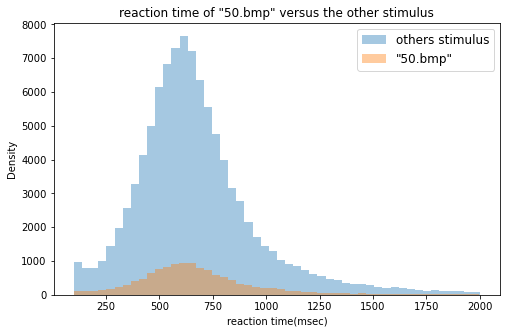

In [397]:
sns.distplot(rt_others,  kde=False, label='others stimulus')
sns.distplot(rt_50,  kde=False,label='\"50.bmp\"')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('reaction time of \"50.bmp\" versus the other stimulus')
plt.xlabel('reaction time(msec)')
plt.ylabel('Density')

## Comparing the reaction time of "50.bmp" with others  via T test

In [311]:
n1 = len(rt_50)
n2 = len(rt_others)
df = min (n1 , n2) - 1
s1 = np.std(rt_50)
s2 = np.std(rt_others)
se = (s1**2/n1 + s2**2/n2)**(0.5)
mean_diff = rt_50.mean() - rt_others.mean() 
tstat = mean_diff/se
p_value = 1 - t.cdf(abs(tstat), df)
if p_value < alpha:
    print(f"p-value:{p_value} < {alpha} -> reject the null hypothesis: reaction time of stimuli near PSE is greater than other stimulus")
else:
    print(f"p-value:{p_value} > {alpha} -> we can't say reaction time of stimuli near PSE is greater than other stimulus")

p-value:0.142331912242477 > 0.05 -> we can't say reaction time of stimuli near PSE is greater than other stimulus


## <font color=blue>7) Representational Similarity Analysis (RSA)</font>

In [399]:
PSE_pos1 = pd.DataFrame(columns = ['sbj','loc1','loc2','loc3','loc4','loc5','loc6','loc7','loc8','loc9','loc10','loc11','loc12','loc13'])
for sb in ls:
    d1 = data_new11.loc[data_new11['sbj']==sb ,['stm','pos','ans']]
    tmp = []
    tmp.append(sb)
    for i in range(0,13):
        xdata = d1[ d1['pos'] == i]['stm'].to_numpy()
        ydata = d1[ d1['pos'] == i]['ans'].to_numpy()
        try:
            popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000)
        except:
            pass
        x = np.linspace(-55, 55, 9)
        y1 = sigmoid(x, *popt)
        y2 = np.array([0.5]* len(x))
        y3 = np.array([0.4]* len(x))
        y4 = np.array([0.3]* len(x))

        first_line = LineString(np.column_stack((x, y1)))# PSE curve
        second_line = LineString(np.column_stack((x, y2)))# the 0.5 line
        intersection = first_line.intersection(second_line)# finding their intersection(if they intersect)
        x_in, y_in = intersection.xy

        second_line = LineString(np.column_stack((x, y3)))# the 0.4 line
        intersection = first_line.intersection(second_line)# finding their intersection(if they intersect)
        x1_in, y1_in = intersection.xy
        
        second_line = LineString(np.column_stack((x, y4)))# the 0.3 line
        intersection = first_line.intersection(second_line)# finding their intersection(if they intersect)
        x2_in, y2_in = intersection.xy
        try:
            tmp.append(x_in[0])
        except:
            try:
                tmp.append(x1_in[0])
            except:
                try:
                    tmp.append(x2_in[0])
                except:
                    pass
    if len(tmp)== 14:
        new_tmp = {'sbj' : str(tmp[0]), 'loc1' : tmp[1], 'loc2' : tmp[2], 'loc3' : tmp[3], 'loc4' : tmp[4], 'loc5' : tmp[5], 'loc6' : tmp[6], 'loc7' : tmp[7], 'loc8' : tmp[8], 'loc9' : tmp[9], 'loc10' : tmp[10], 'loc11' : tmp[11], 'loc12' : tmp[12], 'loc13' : tmp[13]}
        PSE_pos1=PSE_pos1.append(new_tmp, ignore_index=True)
PSE_pos1

sbj       loc1       loc2       loc3       loc4       loc5  \
0   8101004201  -8.185126  13.699357  10.098119   6.362041   0.697918   
1   8101976831  39.232751  18.627904  43.014676  53.098035  28.482736   
2   8101981632 -12.893360  32.011645 -20.167626   9.469794   9.116319   
3   8101992521  -0.164364  20.484048  13.000345  -4.337994   2.951731   
4   8101005261  34.053089  15.433630  50.886299   1.943003  46.862228   
5   8101003283  -9.540097  -9.540097  -9.540097  -9.540097  -9.540097   
6   8101992751   6.875001  29.151029   6.875008   6.875005  12.297351   
7   8101003792  24.605194  51.939696  53.372696  39.775137  28.521067   
8   8101990401 -13.839937   9.594894  26.406830   0.341045  12.008226   
9   8101000631  42.681986  39.644002  51.217906  38.064631  30.551612   
10  8101003282  39.263846  49.322132  37.110710  34.836553  -7.025421   

         loc6       loc7       loc8       loc9      loc10      loc11  \
0   15.008869  16.661440   3.269714 -10.521121  -3.415635 -13.905485   
1   29.801500   3.476786  42.084836  -1.234132  41.121969  29.799966   
2    2.233458  19.232509  31.933192  13.999180  -0.300710  20.654342   
3    4.095485   9.448476  18.312200 -14.289562 -16.102298  -5.412030   
4   29.939823   9.484200  21.805857  -0.452735   7.929039  24.275896   
5    4.345846   4.345846   4.345846   4.345846   4.345846   4.345846   
6   20.666594   6.875003  23.783110 -11.196346   7.672514 -21.965452   
7   38.192376  20.257434  35.109504  49.667620 -37.371476  28.107865   
8  -10.188797   8.263344   0.979657  46.478992  20.484493  46.247658   
9   43.932369  10.420402  33.546988  45.241348  38.802634   0.598367   
10 -12.409485  25.372624  48.261348  43.616028   4.811199 -23.564927   

        loc12      loc13  
0   16.695767  -6.007057  
1    8.953200  20.553363  
2   25.781921  23.077612  
3    1.077290   0.768618  
4    2.508848  -9.540097  
5    4.345846   4.345846  
6    8.440970  52.065144  
7   41.647526  28.568083  
8    5.770346  29.175079  
9   22.487419  39.020269  
10   9.775151 -24.926748

## RDM for the 11 subjects

In [476]:
RDM = [[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11]
PSE_pos2 = PSE_pos1.copy()
PSE_pos2 = PSE_pos2.values.tolist()
for i in range(11):
    for j in range(11): 
        euc_dis = 0
        for k in range(1,14):
            euc_dis += (PSE_pos2[i][k] - PSE_pos2[j][k])**2
        RDM[i][j] = round((euc_dis)**(0.5),2)
# print(RDM)
for i in range(11):
        print(RDM[i])

[0.0, 113.83, 71.27, 34.25, 90.12, 49.25, 69.2, 127.37, 99.93, 125.71, 107.1]
[113.83, 0.0, 112.25, 113.17, 74.71, 125.27, 100.91, 109.07, 112.24, 67.93, 114.53]
[71.27, 112.25, 0.0, 68.89, 108.95, 68.84, 73.22, 113.11, 81.1, 120.46, 114.64]
[34.25, 113.17, 68.89, 0.0, 83.89, 52.78, 64.97, 124.42, 98.1, 128.68, 104.31]
[90.12, 74.71, 108.95, 83.89, 0.0, 105.38, 101.31, 105.45, 102.68, 94.47, 112.37]
[49.25, 125.27, 68.84, 52.78, 105.38, 0.0, 81.68, 146.52, 82.99, 139.9, 125.93]
[69.2, 100.91, 73.22, 64.97, 101.31, 81.68, 0.0, 121.87, 106.7, 101.71, 120.44]
[127.37, 109.07, 113.11, 124.42, 105.45, 146.52, 121.87, 0.0, 120.21, 87.62, 113.57]
[99.93, 112.24, 81.1, 98.1, 102.68, 82.99, 106.7, 120.21, 0.0, 115.2, 129.11]
[125.71, 67.93, 120.46, 128.68, 94.47, 139.9, 101.71, 87.62, 115.2, 0.0, 106.46]
[107.1, 114.53, 114.64, 104.31, 112.37, 125.93, 120.44, 113.57, 129.11, 106.46, 0.0]


## Drawing the RDM matrix (with Euclidean Distance)

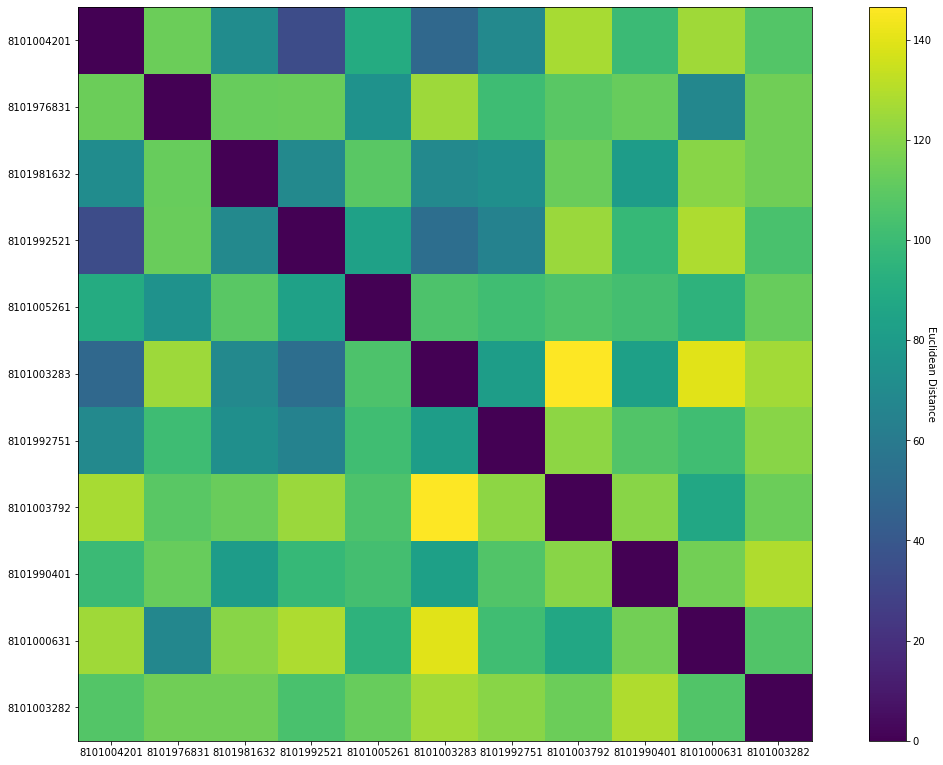

In [454]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
img = ax.imshow(RDM)
x_label_list = list(PSE_pos1['sbj'])
y_label_list = list(PSE_pos1['sbj'])
ax.set_xticks(list(range(0,11)))
ax.set_yticks(list(range(0,11)))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
fig.set_size_inches(20.5, 13.5)
cbar = fig.colorbar(img)
cbar.set_label('Euclidean Distance', rotation=270)

In [349]:
from sklearn.cluster import KMeans
clusters = 2
kmeans = KMeans(n_clusters = clusters)
PSE_pos1.drop(columns='sbj', axis='columns', inplace=True)
kmeans.fit(PSE_pos1)

print(kmeans.labels_)

[0 1 0 0 1 0 0 1 0 1 1]


In [480]:
cluster0 = ["8101004201","8101981632","8101992521","8101003283","8101992751","8101990401"]

In [482]:
cluster1 = ["8101976831","8101005261","8101003792","8101000631","8101003282"]

## reorderd RDM

In [483]:
reord = [0,8,2,3,6,5,4,7,1,9,10]
#df.reindex(["Z", "C", "A"])
reord_RDM = [[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11,[0]*11]
PSE_pos3 = PSE_pos1.copy()
PSE_pos3 = PSE_pos3.reindex([0,8,2,3,6,5,4,7,1,9,10])
PSE_pos3 = PSE_pos3.values.tolist()
for i in range(11):
    for j in range(11): 
        euc_dis = 0
        for k in range(1,14):
            euc_dis += (PSE_pos3[i][k] - PSE_pos3[j][k])**2
        reord_RDM[i][j] = round((euc_dis)**(0.5),2)
     
for i in range(11):
        print(reord_RDM[i])

[0.0, 99.93, 71.27, 34.25, 69.2, 49.25, 90.12, 127.37, 113.83, 125.71, 107.1]
[99.93, 0.0, 81.1, 98.1, 106.7, 82.99, 102.68, 120.21, 112.24, 115.2, 129.11]
[71.27, 81.1, 0.0, 68.89, 73.22, 68.84, 108.95, 113.11, 112.25, 120.46, 114.64]
[34.25, 98.1, 68.89, 0.0, 64.97, 52.78, 83.89, 124.42, 113.17, 128.68, 104.31]
[69.2, 106.7, 73.22, 64.97, 0.0, 81.68, 101.31, 121.87, 100.91, 101.71, 120.44]
[49.25, 82.99, 68.84, 52.78, 81.68, 0.0, 105.38, 146.52, 125.27, 139.9, 125.93]
[90.12, 102.68, 108.95, 83.89, 101.31, 105.38, 0.0, 105.45, 74.71, 94.47, 112.37]
[127.37, 120.21, 113.11, 124.42, 121.87, 146.52, 105.45, 0.0, 109.07, 87.62, 113.57]
[113.83, 112.24, 112.25, 113.17, 100.91, 125.27, 74.71, 109.07, 0.0, 67.93, 114.53]
[125.71, 115.2, 120.46, 128.68, 101.71, 139.9, 94.47, 87.62, 67.93, 0.0, 106.46]
[107.1, 129.11, 114.64, 104.31, 120.44, 125.93, 112.37, 113.57, 114.53, 106.46, 0.0]


## Drawing the reorderd RDM matrix (with Euclidean Distance)

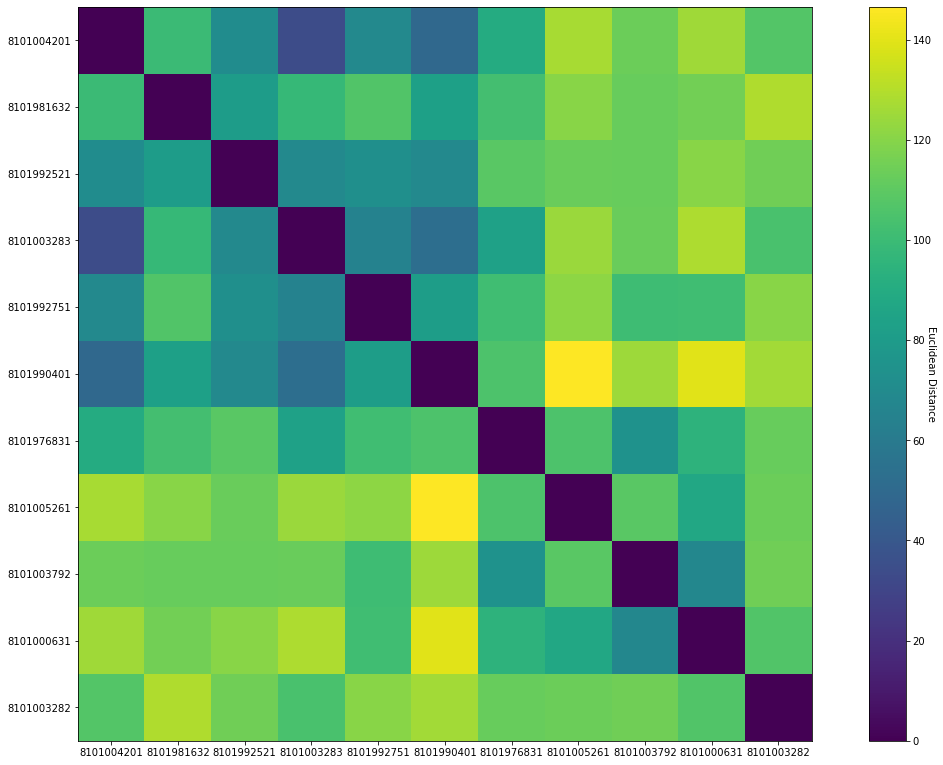

In [481]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
sbjs = cluster0 + cluster1
img = ax.imshow(reord_RDM)
x_label_list = list(sbjs)
y_label_list = list(sbjs)
ax.set_xticks(list(range(0,11)))
ax.set_yticks(list(range(0,11)))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
fig.set_size_inches(20.5, 13.5)
cbar = fig.colorbar(img)
cbar.set_label('Euclidean Distance', rotation=270)

In [459]:
data_new20 = data_new11[['sbj','sex', 'hndns','eye','edu','age']].copy()
data_new20= data_new20.astype({'sbj': str})
data_new20 = data_new20.loc[data_new20['sbj'].isin(cluster0),['sbj','sex','age', 'hndns','eye','edu']]
data_new20 =data_new20.drop_duplicates()
data_new20

sbj sex   age hndns eye  edu
3744    8101004201   f  25.0     r   r  2.0
20593   8101976831   m  21.0     r   r  2.0
37448   8101981632   f  19.0     r   r  1.0
59912   8101992521   f  22.0     r   r  2.0
65528   8101003283   m  25.0     r   r  2.0
78633   8101992751   m  23.0     r   r  3.0
102973  8101990401   f  22.0     r   r  2.0

In [461]:
data_new21 = data_new11[['sbj','sex', 'hndns','eye','edu','age','pos']].copy()
data_new21= data_new21.astype({'sbj': str})
data_new21 = data_new21.loc[data_new21['sbj'].isin(cluster1),['sbj','sex','age', 'hndns','eye','edu']]
data_new21 =data_new21.drop_duplicates()
data_new21

sbj sex   age hndns eye  edu
20593   8101976831   m  21.0     r   r  2.0
63656   8101005261   f  22.0     r   r  2.0
86125   8101003792   m  23.0     l   r  3.0
110463  8101000631   m  25.0     r   r  2.0
114207  8101003282   m  26.0     r   l  2.0

In [496]:
lst1 = list(data_new21['edu'])
lst2 = list(data_new20['edu'])

In [495]:
n1 = len(lst1)
n2 = len(lst2)
df = min (n1 , n2) - 1
s1 = np.std(lst1)
s2 = np.std(lst2)
se = (s1**2/n1 + s2**2/n2)**(0.5)
mean_diff = sum(lst1)/n1 - sum(lst2)/n2
tstat = mean_diff/se
p_value = 2*(1 - t.cdf(abs(tstat), df))
if p_value < alpha:
    print(f"p-value:{p_value} < {alpha} -> reject the null hypothesis: there is a statistically significant difference between the education of thw two clusters")
else:
    print(f"p-value:{p_value} > {alpha} -> there is not a statistically significant difference between the education of the two clusters")

p-value:0.4997448957032611 > 0.05 -> there is not a statistically significant difference between the age of thw two clusters
